<h1 align="center"> The Rise of Airbnb and Its Performance in Chicago </h1>
<h2 align="center"> Tracy Cui Zou </h2>



# 1. Introduction

Airbnb is the paragon of sharing economy, providing a platform for people (the hosts) to share spare rooms and properties with tourists (the guests). Compared to the traditional hotel industries, Airbnb brings customers much-diversified property types and customized experiences, from boat to treehouse, from loft to an entire townhouse. Meanwhile, the tourists may pay less for the rooms in Airbnb, especially in some big cities, where one night stay in hotels may cost several hundred dollars. Using the Airbnb platform, hosts and guests get to know each other through profiles and reviews. Since the review is a two-way process, hosts get more confidence in sharing their property with strangers, while guests know more about hosts and find a favorite room/house. All these features enable Airbnb as one of the most popular online community marketplaces within the last 10 years, present in more than 65,000 cities and 191 countries.  

However, the big downside of using Airbnb instead of a hotel is the unpredictable risk, which the user does not know until he or she checks in. The user experience and satisfaction can be measured and further improved through the analysis of reviews, both quantitative scores, and qualitative comments. Also, Airbnb should provide useful information to help its hosts gain more profits, e.g. which property type is more popular, which neighborhood is safer, which day you can charge higher prices. 

In this project, we conducted a thorough analysis of Airbnb's listings in Chicago. We focused on some potential factors, such as super host status, response time, neighborhood, and different days of the week, etc., to test how they affect the prices and review scores. We also used **regression models** to find out the direction and strength of the relationship between all the independent variables and the dependent variables (price, review scores, super host). P-value will be used to measure the significance. Besides, **prediction and classification models** were built to answer specific research questions, as follows:

1. What factors affect price?
2. How price change based on different neighbourhoods and property types?
3. What factors contribute to high review score?
4. How can a host become a superhost?

Finally, **clustering analysis** based on **RFM (Recency, Frequency, Monetary value)** was introduced to to better understand market segmentation in Chicago. This insight will help Airbnb focus on those listings/properties generating most profits.

# 2. Data Source and Collection

Our data source is "Inside Airbnb" (http://insideairbnb.com/get-the-data.html). In this project, we chose the Airbnb data of Chicago, since Chicago is a very popular city with thousands of attractions and only 7 hours from Rolla.

This Airbnb dataset includes three subsets (listings, calendar and reviews).

**Listings data frame** contains **95** variables (columns) and **5207** observations (rows). After reviewing and comparing all the variables, we recognized 15 repeated variables, so the valid variables were reduced to 80, which was still more than the requirement (20). Those **80** unique variables provide useful description of listing/home, such as the price per night, neighborhood, amenities, room type, etc. They also capture the review scores (general score, accuracy/cleanliness/check in/communication score etc.) from the previous guests. Meanwhile, detailed host information are also included, such as whether a host’s identity was verified or not, how soon a host will respond to guest’s inquiry, or booking request. 

**Calendar data frame** contains **4** variables (columns) and **1,048,575** observations (rows). For each listing/room in Chicago, this calendar data indicates its availability (true/false) from May 10, 2017 to May 9, 2018 (consider this as a snapshot of occupancy status when the data was extracted ). If a listing/room for a specific date is available, then there is a price for it.  

**Reviews data frame** has **6** variables (columns) and **132,354** observations (rows). It captures the comments posted by guest/reviewer for a stay, which was further denoted by listing id and date of the stay.

In general, with so many variables and observations of Airbnb dataset, we would like to utilize machine learning to answer the research questions mentioned above and provide insightful recommendations to Airbnb to boost its future business and customer experience.     

# 3. Data Manipulation

In [1]:
# ignore the warnings in this project
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the modules into the current environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn import preprocessing

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import neural_network
from sklearn import tree

%matplotlib inline

## 3.1 Data Extraction

In [3]:
# read the original dataset 'listings'
listing = pd.read_csv('listings.csv')
listing.head().transpose()

0  \
id                                                                         13824783   
listing_url                                   https://www.airbnb.com/rooms/13824783   
scrape_id                                                            20170510102046   
last_scraped                                                             2017-05-10   
name                                  Full floor of a city cottage (up to 4 guests)   
summary                           This 3rd-floor garrett apartment (built-out at...   
space                             This is more of an apartment or flat than a ro...   
description                       This 3rd-floor garrett apartment (built-out at...   
experiences_offered                                                            none   
neighborhood_overview             This quiet corner of a neighborhood (Bowmanvil...   
notes                             I welcome long-term visitors (medical students...   
transit                           You’re not far from all that Chicago has to of...   
access                            The third floor and dedicated first floor bath...   
interaction                       Because I largely work at home in my second-fl...   
house_rules                       - Private bathroom is on the first floor (slig...   
thumbnail_url                     https://a0.muscache.com/im/pictures/510d45f8-e...   
medium_url                        https://a0.muscache.com/im/pictures/510d45f8-e...   
picture_url                       https://a0.muscache.com/im/pictures/510d45f8-e...   
xl_picture_url                    https://a0.muscache.com/im/pictures/510d45f8-e...   
host_id                                                                    55020055   
host_url                                 https://www.airbnb.com/users/show/55020055   
host_name                                                                      Russ   
host_since                                                               2016-01-17   
host_location                                      Chicago, Illinois, United States   
host_about                        I'm a professional business writer and publish...   
host_response_time                                                   within an hour   
host_response_rate                                                             100%   
host_acceptance_rate                                                            NaN   
host_is_superhost                                                                 t   
host_thumbnail_url                https://a0.muscache.com/im/pictures/63b3bbeb-6...   
...                                                                             ...   
guests_included                                                                   2   
extra_people                                                                 $15.00   
minimum_nights                                                                    2   
maximum_nights                                                                 1125   
calendar_updated                                                         2 days ago   
has_availability                                                                NaN   
availability_30                                                                   1   
availability_60                                                                   8   
availability_90                                                                  14   
availability_365                                                                 32   
calendar_last_scraped                                                    2017-05-10   
number_of_reviews                                                                25   
first_review                                                             2016-07-23   
last_review                                                              2017-05-07   
review_scores_rating                                                            

In [4]:
# drop repeated or useless variables in listing data frame and save the remaining variable to a new data frame: listing_remain
listing_remain = listing.drop(['scrape_id','last_scraped','summary','experiences_offered','thumbnail_url',
              'medium_url','picture_url','xl_picture_url','host_acceptance_rate','host_thumbnail_url',
              'host_picture_url','host_listings_count','street','neighbourhood','neighbourhood_group_cleansed',
             'smart_location','country','square_feet','has_availability','calendar_last_scraped','jurisdiction_names',
             'calculated_host_listings_count'],axis =1)


In [5]:
# show the head of the new dataset
listing_remain.head().transpose()

0  \
id                                                                         13824783   
listing_url                                   https://www.airbnb.com/rooms/13824783   
name                                  Full floor of a city cottage (up to 4 guests)   
space                             This is more of an apartment or flat than a ro...   
description                       This 3rd-floor garrett apartment (built-out at...   
neighborhood_overview             This quiet corner of a neighborhood (Bowmanvil...   
notes                             I welcome long-term visitors (medical students...   
transit                           You’re not far from all that Chicago has to of...   
access                            The third floor and dedicated first floor bath...   
interaction                       Because I largely work at home in my second-fl...   
house_rules                       - Private bathroom is on the first floor (slig...   
host_id                                                                    55020055   
host_url                                 https://www.airbnb.com/users/show/55020055   
host_name                                                                      Russ   
host_since                                                               2016-01-17   
host_location                                      Chicago, Illinois, United States   
host_about                        I'm a professional business writer and publish...   
host_response_time                                                   within an hour   
host_response_rate                                                             100%   
host_is_superhost                                                                 t   
host_neighbourhood                                                   Lincoln Square   
host_total_listings_count                                                         1   
host_verifications                 ['email', 'phone', 'facebook', 'reviews', 'kba']   
host_has_profile_pic                                                              t   
host_identity_verified                                                            t   
neighbourhood_cleansed                                               Lincoln Square   
city                                                                        Chicago   
state                                                                            IL   
zipcode                                                                       60625   
market                                                                      Chicago   
...                                                                             ...   
weekly_price                                                                    NaN   
monthly_price                                                                   NaN   
security_deposit                                                                NaN   
cleaning_fee                                                                 $30.00   
guests_included                                                                   2   
extra_people                                                                 $15.00   
minimum_nights                                                                    2   
maximum_nights                                                                 1125   
calendar_updated                                                         2 days ago   
availability_30                                                                   1   
availability_60                                                                   8   
availability_90                                                                  14   
availability_365                                                                 32   
number_of_reviews                                                                25   
first_review                                                             2016-07

In [6]:
# show the information of this dataframe
listing_remain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5207 entries, 0 to 5206
Data columns (total 73 columns):
id                                  5207 non-null int64
listing_url                         5207 non-null object
name                                5206 non-null object
space                               3949 non-null object
description                         5206 non-null object
neighborhood_overview               3588 non-null object
notes                               2579 non-null object
transit                             3756 non-null object
access                              3561 non-null object
interaction                         3545 non-null object
house_rules                         3898 non-null object
host_id                             5207 non-null int64
host_url                            5207 non-null object
host_name                           5207 non-null object
host_since                          5207 non-null object
host_location                       5194

### Data dictionary of listing_remain data frame

- **id**:	id number of the home/listing
- **listing_url**:	Airbnb link_main page for the room information
- **name**:	name of the home/listing
- **space**:	detailed information of the home/listing space
- **description**:	basic features of the home/listing, same as "summary" variable
- **neighborhood_overview**:	location and features of the neighborhood
- **notes**:	additional services/requirements from host
- **transit**:	transportation and parking information
- **access**:	areas and appliances/facilities that can be used
- **interaction**:	host-guest interaction/communication
- **house_rules**:	rules when stay in the listing/home
- **host_id**:	id number of host
- **host_url**:	link of host's profile page
- **host_name**:	host name
- **host_since**:	when host joined Airbnb
- **host_location**:	host location (City, State, Country)
- **host_about**:	self-introduction about the host
- **host_response_time**:	how soon host response to guest's inquiry/booking
- **host_response_rate**:	percentage host replys to guest's inquiry/booking
- **host_is_superhost**:	certified as superhost or not
- **host_neighbourhood**:	neighbourhood the listing/home belongs to
- **host_total_listings_count**:	total number of listings/rooms owned by the host
- **host_verifications**:	types of verification host submitted (government id, social media account, email, phone, etc)
- **host_has_profile_pic**:	host submitted profile picture or not
- **host_identity_verified**:	host's identity was verified or not
- **neighbourhood_cleansed**:	cleansed neighourhood information
- **city**:	city
- **state**:	state
- **zipcode**:	zipcode
- **market**:	city (Chicago)
- **country_code**:	US
- **latitude**:	latitude of listing/room
- **longitude**:	longitude of listing/room
- **is_location_exact**:	location is exact or not
- **property_type**:	apartment/house/townhouse/etc
- **room_type**:	private room/shared room/entire home
- **accommodates**:	max number of guests allowed in listing/room
- **bathrooms**:	number of bathrooms
- **bedrooms**:	number of bedrooms
- **beds**:	number of beds
- **bed_type**:	real bed/fulton/couch/airbed/etc
- **amenities**:	amenities available for guest
- **price**:	price per night
- **weekly_price**:	price per week
- **monthly_price**:	price per month
- **security_deposit**:	security deposit amount
- **cleaning_fee**:	cleaning fee
- **quests_included**:	allowed guest numbers
- **extra_people**:	fee for extra people
- **minimum_nights**:	minimum nights per stay
- **maximum_nights**:	maximum nights per stay
- **calendar_updated**:	when calendar was updated
- **availability_30**:	how many days the listing/room will be available for next 30 days
- **availability_60**:	how many days the listing/room will be available for next 60 days
- **availability_90**:	how many days the listing/room will be available for next 90 days
- **availability_365**:	how many days the listing/room will be available for next 365 days
- **number_of_reviews**:	number of reviews of listing/room
- **first_review**:	date for first review
- **last_review**:	date for last review
- **review_scores_rating**:	review score in general (0 - 100)
- **review_scores_accuracy**:	review score for accuracy (0 - 10)
- **review_scores_cleanliness**:	review score for cleanliness (0 - 10)
- **review_scores_checkin**:	review score for checkin process (0 - 10)
- **review_scores_communication**:	review score for communication (0 - 10)
- **review_scores_location**:	review score for location (0 - 10)
- **review_scores_value**:	review score for value (0 - 10)
- **requires_license**:	registration license required by city or not
- **license**:	registration license number/condition
- **instant_bookable**:	instant book or not
- **cancellation_policy**:	strict/flexible/moderate/etc
- **require_guest_profile_picture**:	guest profile picture needed or not
- **require_guest_phone_verification**:	guest phone verification needed or not
- **reviews_per_month**:	reviews received per month

We excluded the variables that need to be processed by text mining, such as 'notes' and 'house rules'. We also excluded the useless variables, such as the 'host_url' and 'city, state, and zipcode'. We will focus on numeric data and categorical data to do regression and prediction/classification in the following sections.

In [7]:
# df1: create a new data frame that contains the numeric and categorical variables
df1=listing_remain[['id','host_is_superhost','host_since','host_response_time','host_response_rate',
                'host_neighbourhood','host_id','host_total_listings_count',
                'host_identity_verified','property_type','room_type','bed_type',
                'accommodates','bathrooms','bedrooms','beds','security_deposit','availability_30',
                'price','cleaning_fee','number_of_reviews','review_scores_rating',
                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location',
                'review_scores_value','instant_bookable','cancellation_policy','last_review','reviews_per_month']]
df1.transpose()

0               1               2     \
id                                 13824783        16740225        18125245   
host_is_superhost                         t               f               f   
host_since                       2016-01-17      2015-06-25      2015-12-18   
host_response_time           within an hour  within an hour  within an hour   
host_response_rate                     100%            100%            100%   
host_neighbourhood           Lincoln Square  Lincoln Square  Lincoln Square   
host_id                            55020055        36722941        51669215   
host_total_listings_count                 1               3               1   
host_identity_verified                    t               t               t   
property_type                         House     Condominium       Townhouse   
room_type                      Private room    Private room    Private room   
bed_type                           Real Bed        Real Bed        Real Bed   
accommodates                              4               2               6   
bathrooms                                 1               1             1.5   
bedrooms                                  1               1               2   
beds                                      2               1               3   
security_deposit                        NaN             NaN         $150.00   
availability_30                           1               0              11   
price                                $56.00          $36.00          $80.00   
cleaning_fee                         $30.00          $35.00          $65.00   
number_of_reviews                        25               0               4   
review_scores_rating                     99             NaN              95   
review_scores_accuracy                   10             NaN              10   
review_scores_cleanliness                10             NaN              10   
review_scores_checkin                    10             NaN              10   
review_scores_communication              10             NaN              10   
review_scores_location                   10             NaN              10   
review_scores_value                      10             NaN              10   
instant_bookable                          t               t               f   
cancellation_policy                moderate          strict        moderate   
last_review                      2017-05-07             NaN      2017-05-09   
reviews_per_month                      2.57             NaN               4   

                                           3               4     \
id                                      8362570          789867   
host_is_superhost                             t               f   
host_since                           2015-05-07      2012-06-29   
host_response_time           within a few hours  within an hour   
host_response_rate                         100%            100%   
host_neighbourhood               Lincoln Square  Lincoln Square   
host_id                                32837114         2782694   
host_total_listings_count                     1               1   
host_identity_verified                        t               t   
property_type                       Condominium       Apartment   
room_type                          Private room    Private room   
bed_type                               Real Bed        Real Bed   
accommodates                                  2               3   
bathrooms                                     1               1   
bedrooms                                      1               1   
beds                                          1               1   
security_deposit                            NaN             NaN   
availability_30                               4              13   
price                                    $80.00          $20.00   
cleaning_fee                             $10.00             NaN   
number_of_reviews       

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5207 entries, 0 to 5206
Data columns (total 32 columns):
id                             5207 non-null int64
host_is_superhost              5207 non-null object
host_since                     5207 non-null object
host_response_time             4951 non-null object
host_response_rate             4951 non-null object
host_neighbourhood             4546 non-null object
host_id                        5207 non-null int64
host_total_listings_count      5207 non-null int64
host_identity_verified         5207 non-null object
property_type                  5207 non-null object
room_type                      5207 non-null object
bed_type                       5207 non-null object
accommodates                   5207 non-null int64
bathrooms                      5201 non-null float64
bedrooms                       5206 non-null float64
beds                           5204 non-null float64
security_deposit               1999 non-null object
availabili

## 3.2 Detecting Missing Values

As shown above, df1 contains 5207 observations (rows) and 30 variables (columns). Some variables (e.g. host_neighbourhood, security_deposit) have missing values (shown as NaN in the data frame). The following step will calculate the number of missing values of three datasets.

### 3.2.1 Detect and manipulate listing dataset (df1)

In [9]:
# the number of missing value in listings
df1.apply(lambda x: sum(x.isnull()), axis=0)

id                                0
host_is_superhost                 0
host_since                        0
host_response_time              256
host_response_rate              256
host_neighbourhood              661
host_id                           0
host_total_listings_count         0
host_identity_verified            0
property_type                     0
room_type                         0
bed_type                          0
accommodates                      0
bathrooms                         6
bedrooms                          1
beds                              3
security_deposit               3208
availability_30                   0
price                             0
cleaning_fee                   1290
number_of_reviews                 0
review_scores_rating            738
review_scores_accuracy          741
review_scores_cleanliness       741
review_scores_checkin           747
review_scores_communication     743
review_scores_location          747
review_scores_value         

According to the outcome, security_deposit and availability_30 have many missing value (61.6% and 24.8% respectively). We will drop these two variables.

In [10]:
df1=df1.drop(['security_deposit','cleaning_fee'], axis = 1)
df1.head()

id host_is_superhost  host_since  host_response_time  \
0  13824783                 t  2016-01-17      within an hour   
1  16740225                 f  2015-06-25      within an hour   
2  18125245                 f  2015-12-18      within an hour   
3   8362570                 t  2015-05-07  within a few hours   
4    789867                 f  2012-06-29      within an hour   

  host_response_rate host_neighbourhood   host_id  host_total_listings_count  \
0               100%     Lincoln Square  55020055                          1   
1               100%     Lincoln Square  36722941                          3   
2               100%     Lincoln Square  51669215                          1   
3               100%     Lincoln Square  32837114                          1   
4               100%     Lincoln Square   2782694                          1   

  host_identity_verified property_type        ...          \
0                      t         House        ...           
1                      t   Condominium        ...           
2                      t     Townhouse        ...           
3                      t   Condominium        ...           
4                      t     Apartment        ...           

  review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                   10.0                      10.0                   10.0   
1                    NaN                       NaN                    NaN   
2                   10.0                      10.0                   10.0   
3                   10.0                      10.0                   10.0   
4                    9.0                       9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                          NaN                     NaN                  NaN   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                 10.0   
4                         10.0                    10.0                  9.0   

   instant_bookable cancellation_policy  last_review  reviews_per_month  
0                 t            moderate   2017-05-07               2.57  
1                 t              strict          NaN                NaN  
2                 f            moderate   2017-05-09               4.00  
3                 f            flexible   2016-11-07               0.87  
4                 t              strict   2017-04-16               1.96  

[5 rows x 30 columns]

For other missing value, we choose to do list-wise deletion, because even after droping those observation, we still have 3748 observations.

In [11]:
df1_nonnull=df1.dropna(axis=0, how='any')
df1_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3748 entries, 0 to 5198
Data columns (total 30 columns):
id                             3748 non-null int64
host_is_superhost              3748 non-null object
host_since                     3748 non-null object
host_response_time             3748 non-null object
host_response_rate             3748 non-null object
host_neighbourhood             3748 non-null object
host_id                        3748 non-null int64
host_total_listings_count      3748 non-null int64
host_identity_verified         3748 non-null object
property_type                  3748 non-null object
room_type                      3748 non-null object
bed_type                       3748 non-null object
accommodates                   3748 non-null int64
bathrooms                      3748 non-null float64
bedrooms                       3748 non-null float64
beds                           3748 non-null float64
availability_30                3748 non-null int64
price      

### 3.2.2 Detect and manipulate calendar dataset

In [12]:
# read the dataset 'Calendar' 
calendar = pd.read_csv("calendar.csv")
calendar.head().transpose()

0           1           2           3           4
listing_id    13824783    13824783    13824783    13824783    13824783
date        2018-02-23  2018-02-22  2018-02-21  2018-02-20  2018-02-19
available            f           f           f           f           f
price              NaN         NaN         NaN         NaN         NaN

In [13]:
# find the missing values in calendar
calendar.apply(lambda x: sum(x.isnull()), axis=0)

listing_id         0
date               0
available          0
price         979804
dtype: int64

The reason why price has missing values is because for those days that a room is not available, the price is listed as null value. We only keep the available rooms for this project.

In [14]:
# select rows when availability is true (t)
calendar_available=calendar[calendar['available']=='t']
calendar_available.sample(3)

listing_id        date available    price
168018     14958355  2017-12-25         t   $47.00
1799343     8580517  2017-08-24         t  $188.00
1083354    11698196  2018-04-05         t  $102.00

In [15]:
# detect the missing value again
calendar_available.apply(lambda x: sum(x.isnull()), axis=0)

listing_id    0
date          0
available     0
price         0
dtype: int64

### 3.2.3 Detect and manipulate reviews dataset

In [16]:
# read the dataset 'reviews'
reviews = pd.read_csv('reviews.csv')
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     1027405  35183788  2015-06-15     28799386      Seo Hyun   
1     1027405  35746894  2015-06-21     36002247       Colleen   
2     1027405  37359380  2015-07-06     35422627         Susan   
3     1027405  45254342  2015-09-01     35829599      Victoria   
4     1027405  46872479  2015-09-14     17346096      Brittney   

                                            comments  
0  Dianna는 매우 친절했다. 그리고 다른 숙박객들도 친절했다. Dianna가 집에...  
1  House was clean, host was responsive.  The des...  
2  I LOVED staying at the Urban Art Retreat!! Dia...  
3  I was immediately greeted at the door by Diann...  
4  Dianna was great with communication and super ...

In [17]:
# find the missing values in reviews
reviews.apply(lambda x: sum(x.isnull()), axis=0)

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         147
dtype: int64

Since the missing value is not many, we choose to fill in value automatically.

In [18]:
reviews_nonnull=reviews.fillna(method='ffill')

In [19]:
# detect the missing value again
reviews_nonnull.apply(lambda x: sum(x.isnull()), axis=0)

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

### Data dictionary of reviews data frame

- **listing_id**:	id number of the home/listing
- **id**:	id for a review
- **date**:	when the review was posted
- **reviewer_id**:	id number of the guest/reviewer
- **reviewer_name**:	reviewer's name
- **comments**:	comments about stay

## 3.3 Data Transformation

**df1_nonnull dataframe** will be the cleansed dataset for listings, which includes almost all the numerical variables.
**Calendar_available and reviews_nonnull dataset** include more detailed information that will be analyzed with df1_nonnull together.

In [20]:
# manipulate data to make it available for datatype changing.
df1_nonnull['price'] = df1_nonnull['price'].str.replace('$','')
df1_nonnull['price'] = df1_nonnull['price'].str.replace(',','')
df1_nonnull['host_response_rate'] = df1_nonnull['host_response_rate'].str.replace('%','')
df1_nonnull['cancellation_policy'] = df1_nonnull['cancellation_policy'].str.replace('_30','')
df1_nonnull['cancellation_policy'] = df1_nonnull['cancellation_policy'].str.replace('_60','')

In [21]:
# change datatype to make the data meaningful
df1_nonnull['host_since'] = pd.to_datetime(df1_nonnull['host_since'])
df1_nonnull['id'] = df1_nonnull['id'].astype(object)
df1_nonnull['host_id'] = df1_nonnull['host_id'].astype(object)
df1_nonnull['price'] = df1_nonnull['price'].astype(float)
df1_nonnull['host_response_rate'] = df1_nonnull['host_response_rate'].astype(float)
df1_nonnull['host_neighbourhood'] = df1_nonnull['host_neighbourhood'].astype('category')
df1_nonnull['property_type'] = df1_nonnull['property_type'].astype('category')
df1_nonnull['room_type'] = df1_nonnull['room_type'].astype('category')
df1_nonnull['bed_type'] = df1_nonnull['bed_type'].astype('category')
df1_nonnull['cancellation_policy'] = df1_nonnull['cancellation_policy'].astype('category')
df1_nonnull['host_response_time'] = df1_nonnull['host_response_time'].astype('category')
df1_nonnull['last_review'] = pd.to_datetime(df1_nonnull['last_review'])

In [22]:
df1_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3748 entries, 0 to 5198
Data columns (total 30 columns):
id                             3748 non-null object
host_is_superhost              3748 non-null object
host_since                     3748 non-null datetime64[ns]
host_response_time             3748 non-null category
host_response_rate             3748 non-null float64
host_neighbourhood             3748 non-null category
host_id                        3748 non-null object
host_total_listings_count      3748 non-null int64
host_identity_verified         3748 non-null object
property_type                  3748 non-null category
room_type                      3748 non-null category
bed_type                       3748 non-null category
accommodates                   3748 non-null int64
bathrooms                      3748 non-null float64
bedrooms                       3748 non-null float64
beds                           3748 non-null float64
availability_30                3748 non-n

In [23]:
df1_nonnull.head()

id host_is_superhost host_since  host_response_time  \
0  13824783                 t 2016-01-17      within an hour   
2  18125245                 f 2015-12-18      within an hour   
3   8362570                 t 2015-05-07  within a few hours   
4    789867                 f 2012-06-29      within an hour   
5  16701336                 f 2015-06-25      within an hour   

   host_response_rate host_neighbourhood   host_id  host_total_listings_count  \
0               100.0     Lincoln Square  55020055                          1   
2               100.0     Lincoln Square  51669215                          1   
3               100.0     Lincoln Square  32837114                          1   
4               100.0     Lincoln Square   2782694                          1   
5               100.0     Lincoln Square  36722941                          3   

  host_identity_verified property_type        ...          \
0                      t         House        ...           
2                      t     Townhouse        ...           
3                      t   Condominium        ...           
4                      t     Apartment        ...           
5                      t   Condominium        ...           

  review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                   10.0                      10.0                   10.0   
2                   10.0                      10.0                   10.0   
3                   10.0                      10.0                   10.0   
4                    9.0                       9.0                   10.0   
5                   10.0                      10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                 10.0   
4                         10.0                    10.0                  9.0   
5                         10.0                    10.0                 10.0   

   instant_bookable  cancellation_policy  last_review  reviews_per_month  
0                 t             moderate   2017-05-07               2.57  
2                 f             moderate   2017-05-09               4.00  
3                 f             flexible   2016-11-07               0.87  
4                 t               strict   2017-04-16               1.96  
5                 t               strict   2017-01-25               0.28  

[5 rows x 30 columns]

In [24]:
# reset the index as 0,1,2...
df1_nonnull=df1_nonnull.reset_index(drop=True)
df1_nonnull.head()

id host_is_superhost host_since  host_response_time  \
0  13824783                 t 2016-01-17      within an hour   
1  18125245                 f 2015-12-18      within an hour   
2   8362570                 t 2015-05-07  within a few hours   
3    789867                 f 2012-06-29      within an hour   
4  16701336                 f 2015-06-25      within an hour   

   host_response_rate host_neighbourhood   host_id  host_total_listings_count  \
0               100.0     Lincoln Square  55020055                          1   
1               100.0     Lincoln Square  51669215                          1   
2               100.0     Lincoln Square  32837114                          1   
3               100.0     Lincoln Square   2782694                          1   
4               100.0     Lincoln Square  36722941                          3   

  host_identity_verified property_type        ...          \
0                      t         House        ...           
1                      t     Townhouse        ...           
2                      t   Condominium        ...           
3                      t     Apartment        ...           
4                      t   Condominium        ...           

  review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                   10.0                      10.0                   10.0   
1                   10.0                      10.0                   10.0   
2                   10.0                      10.0                   10.0   
3                    9.0                       9.0                   10.0   
4                   10.0                      10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                  9.0   
4                         10.0                    10.0                 10.0   

   instant_bookable  cancellation_policy  last_review  reviews_per_month  
0                 t             moderate   2017-05-07               2.57  
1                 f             moderate   2017-05-09               4.00  
2                 f             flexible   2016-11-07               0.87  
3                 t               strict   2017-04-16               1.96  
4                 t               strict   2017-01-25               0.28  

[5 rows x 30 columns]

In [25]:
# strip dollar sign from price column
calendar_available['price']=[x.strip('$') for x in calendar_available['price']]
calendar_available.sample(3)

listing_id        date available   price
498375     16965587  2017-11-07         t   99.00
1703384    15272414  2018-02-10         t  117.00
1828932    15641641  2017-06-07         t  150.00

In [26]:
# strip comma from price column
calendar_available['price']=calendar_available['price'].apply(lambda x: x.replace(',',''))

In [27]:
# we notice that data type of price column is not float
calendar_available['price']=calendar_available['price'].astype(float)

# we notice that data type of date column is not datetime
calendar_available['date']=pd.to_datetime(calendar_available['date'])
calendar_available.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [28]:
calendar_available['date'].describe()

count                  920751
unique                    365
top       2017-08-07 00:00:00
freq                     3391
first     2017-05-10 00:00:00
last      2018-05-09 00:00:00
Name: date, dtype: object

In [29]:
calendar_available['dayofweek']=calendar_available['date'].dt.weekday_name
calendar_available['month']=calendar_available['date'].dt.month

import calendar
calendar_available['month'] = calendar_available['month'].apply(lambda x: calendar.month_abbr[x])
calendar_available.sample(5)

listing_id       date available  price dayofweek month
858338     11498469 2017-08-28         t  138.0    Monday   Aug
312916     15581842 2018-01-18         t   55.0  Thursday   Jan
766368     13666998 2017-09-14         t   60.0  Thursday   Sep
504829     13328559 2018-03-12         t  267.0    Monday   Mar
1636686    10971010 2018-01-08         t  120.0    Monday   Jan

# 4. Data Summarization

## 4.1 Create a master data set

Show unique values of categorical varialbes

In [30]:
df1_nonnull['host_response_time'].unique()

[within an hour, within a few hours, within a day, a few days or more]
Categories (4, object): [within an hour, within a few hours, within a day, a few days or more]

In [31]:
df1_nonnull['host_neighbourhood'].unique()

[Lincoln Square, Uptown, Hyde Park, Kenwood, Gay Village, ..., Auburn Gresham, Beverly, Los Feliz, Morgan Park, Edison Park]
Length: 97
Categories (97, object): [Lincoln Square, Uptown, Hyde Park, Kenwood, ..., Beverly, Los Feliz, Morgan Park, Edison Park]

In [32]:
df1_nonnull['property_type'].unique()

[House, Townhouse, Condominium, Apartment, Other, ..., Serviced apartment, Bed & Breakfast, Vacation home, Bungalow, Villa]
Length: 19
Categories (19, object): [House, Townhouse, Condominium, Apartment, ..., Bed & Breakfast, Vacation home, Bungalow, Villa]

In [33]:
df1_nonnull['room_type'].unique()

[Private room, Entire home/apt, Shared room]
Categories (3, object): [Private room, Entire home/apt, Shared room]

In [34]:
df1_nonnull['bed_type'].unique()

[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]
Categories (5, object): [Real Bed, Futon, Pull-out Sofa, Couch, Airbed]

In [35]:
df1_nonnull['cancellation_policy'].unique()

[moderate, flexible, strict, super_strict]
Categories (4, object): [moderate, flexible, strict, super_strict]

As we can see 'host_neighbourhood' and 'property_type' have too many categories. We should reduce the dimensionality before creating dummy variables.

In [36]:
# top 10 frequency (>100) host neighbourhood
df_neighbour = df1_nonnull.host_neighbourhood.value_counts()
type(df_neighbour)
df_neighbour[:]

Lakeview                   272
Logan Square               236
Loop                       193
Lincoln Park               169
Wicker Park                155
West Town/Noble Square     155
Humboldt Park              136
River North                131
Pilsen                     122
Uptown                     118
Avondale                   103
Rogers Park                103
Ukrainian Village           99
Old Town                    92
South Loop/Printers Row     92
Edgewater                   88
Little Italy/UIC            87
Bronzeville                 86
Irving Park                 74
Lincoln Square              67
Hyde Park                   67
West Ridge                  63
Bucktown                    59
West Loop/Greektown         57
Little Village              56
North Center                50
Roscoe Village              48
Gay Village                 47
Bridgeport                  45
Andersonville               44
                          ... 
Archer Heights               3
North Pa

In [37]:
df1_nonnull.index

RangeIndex(start=0, stop=3748, step=1)

In [38]:
# change other neighbourhood as "other"
for i in df1_nonnull.host_neighbourhood:
    if i not in ['Lakeview','Logan Square','Loop', 'Lincoln Park',
                 'Wicker Park','West Town/Noble Square',
                'River North','Humboldt Park','Uptown','Pilsen','other']:
        df1_nonnull['host_neighbourhood'].replace({i:'other'},inplace=True)       

In [39]:
df1_nonnull['host_neighbourhood'].unique()

array(['other', 'Uptown', 'Logan Square', 'Wicker Park', 'River North',
       'Humboldt Park', 'Lincoln Park', 'West Town/Noble Square',
       'Pilsen', 'Loop', 'Lakeview'], dtype=object)

In [40]:
# top 5 frequency (>50) property_type
df_property_type = df1_nonnull.property_type.value_counts()
df_property_type[:]

Apartment             2539
House                  568
Condominium            400
Loft                    78
Townhouse               71
Other                   25
Bed & Breakfast         12
Dorm                    12
Guesthouse              11
Boat                     7
Guest suite              5
Boutique hotel           4
Bungalow                 4
Hostel                   4
Villa                    3
In-law                   2
Vacation home            1
Serviced apartment       1
Timeshare                1
Name: property_type, dtype: int64

In [41]:
# change low frequent property_type as "other"
for i in df1_nonnull.property_type:
    if i not in ['Apartment','House','Condominium', 'Loft','Townhouse']:
        df1_nonnull['property_type'].replace({i:'other'},inplace=True)   

In [42]:
df1_nonnull['property_type'].unique()

array(['House', 'Townhouse', 'Condominium', 'Apartment', 'other', 'Loft'],
      dtype=object)

Get dummy variables for the categorical variables

In [43]:
# create dummy variable for category variables in df1
host_response_time = pd.get_dummies(df1_nonnull['host_response_time'], prefix = 'host_response_time')
host_neighbourhood = pd.get_dummies(df1_nonnull['host_neighbourhood'], prefix = 'host_neighbourhood')
property_type = pd.get_dummies(df1_nonnull['property_type'], prefix = 'property_type')
room_type = pd.get_dummies(df1_nonnull['room_type'], prefix = 'room_type')
bed_type = pd.get_dummies(df1_nonnull['bed_type'], prefix = 'bed_type')
cancellation_policy = pd.get_dummies(df1_nonnull['cancellation_policy'], prefix = 'cancellation_policy')

In [44]:
# change object variable as 1,0.
df1_nonnull['host_is_superhost'].replace(['t','f'],[1,0],inplace=True)
df1_nonnull['instant_bookable'].replace(['t','f'],[1,0],inplace=True)
df1_nonnull['host_identity_verified'].replace(['t','f'],[1,0],inplace=True)

In [45]:
# Concat all dummies and continuous variables (except price) to create a new dataframe that are all numerical
df2 = pd.concat([host_response_time,host_neighbourhood,property_type,
              room_type,bed_type,cancellation_policy,
              df1_nonnull[['host_is_superhost','host_response_rate','host_total_listings_count',
                  'host_identity_verified','accommodates','bathrooms','bedrooms',
                  'beds','availability_30','number_of_reviews','review_scores_rating',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location','review_scores_value',
                  'instant_bookable','price']]
              ],
              axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 52 columns):
host_response_time_a few days or more        3748 non-null uint8
host_response_time_within a day              3748 non-null uint8
host_response_time_within a few hours        3748 non-null uint8
host_response_time_within an hour            3748 non-null uint8
host_neighbourhood_Humboldt Park             3748 non-null uint8
host_neighbourhood_Lakeview                  3748 non-null uint8
host_neighbourhood_Lincoln Park              3748 non-null uint8
host_neighbourhood_Logan Square              3748 non-null uint8
host_neighbourhood_Loop                      3748 non-null uint8
host_neighbourhood_Pilsen                    3748 non-null uint8
host_neighbourhood_River North               3748 non-null uint8
host_neighbourhood_Uptown                    3748 non-null uint8
host_neighbourhood_West Town/Noble Square    3748 non-null uint8
host_neighbourhood_Wicker Park               374

###### Show the histogram of price (in a proper range, say [0,1000]).

Text(0.5,0,'price')

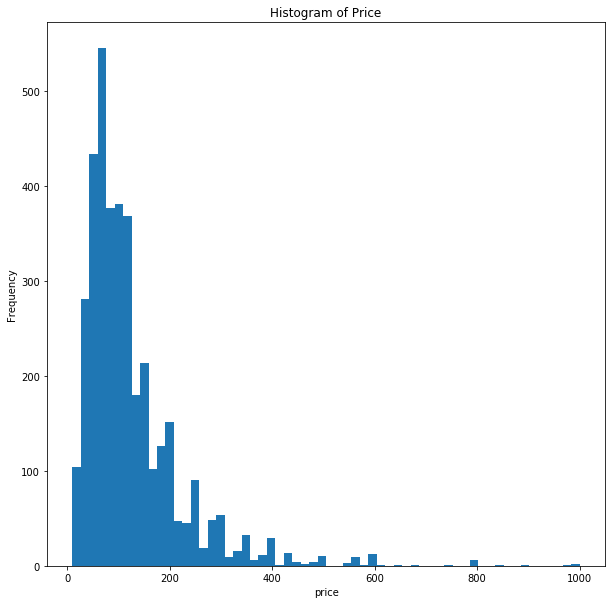

In [46]:
df2[df2['price']<=1000]['price'].plot.hist(bins=60, figsize=(10,10))
plt.title('Histogram of Price')  
plt.xlabel('price')

Most rooms' price fall into the range of 0-200.

Text(0.5,0,'review score')

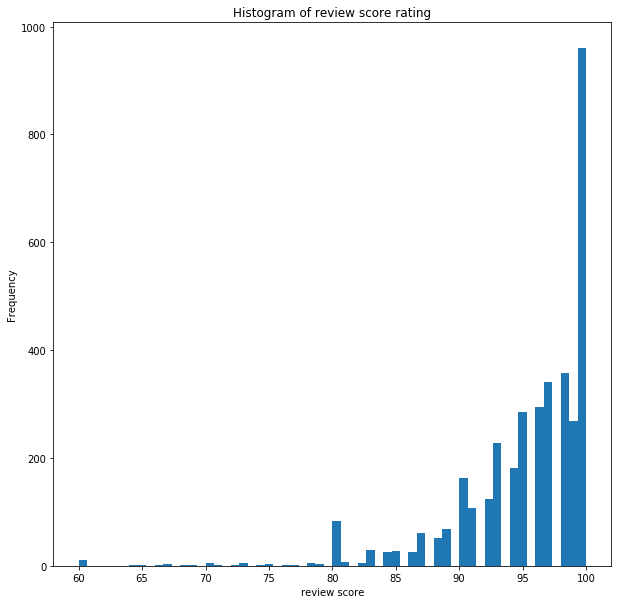

In [47]:
# show the histogram of review socre rating
df2[df2['review_scores_rating']>=60]['review_scores_rating'].plot.hist(bins=60, figsize=(10,10))
plt.title('Histogram of review score rating')  
plt.xlabel('review score')

Most rooms' review score fall into the range of 80-100.

### 4.2 Correlation Analysis

In [48]:
# Show correlation matrix
df2.corr(method='pearson')

host_response_time_a few days or more  \
host_response_time_a few days or more                                   1.000000   
host_response_time_within a day                                        -0.027663   
host_response_time_within a few hours                                  -0.033086   
host_response_time_within an hour                                      -0.099755   
host_neighbourhood_Humboldt Park                                        0.007158   
host_neighbourhood_Lakeview                                             0.010319   
host_neighbourhood_Lincoln Park                                         0.022102   
host_neighbourhood_Logan Square                                        -0.018008   
host_neighbourhood_Loop                                                -0.016186   
host_neighbourhood_Pilsen                                              -0.012742   
host_neighbourhood_River North                                          0.007793   
host_neighbourhood_Uptown                                              -0.012525   
host_neighbourhood_West Town/Noble Square                               0.043720   
host_neighbourhood_Wicker Park                                          0.004954   
host_neighbourhood_other                                               -0.014724   
property_type_Apartment                                                 0.023169   
property_type_Condominium                                               0.000987   
property_type_House                                                    -0.018596   
property_type_Loft                                                     -0.010127   
property_type_Townhouse                                                -0.009653   
property_type_other                                                    -0.011020   
room_type_Entire home/apt                                               0.017432   
room_type_Private room                                                 -0.021130   
room_type_Shared room                                                   0.009432   
bed_type_Airbed                                                        -0.008320   
bed_type_Couch                                                          0.059011   
bed_type_Futon                                                          0.028259   
bed_type_Pull-out Sofa                                                 -0.005459   
bed_type_Real Bed                                                      -0.028195   
cancellation_policy_flexible                                            0.049260   
cancellation_policy_moderate                                           -0.006044   
cancellation_policy_strict                                             -0.034395   
cancellation_policy_super_strict                                       -0.002782   
host_is_superhost                                                      -0.045726   
host_response_rate                                                     -0.558013   
host_total_listings_count                                              -0.011661   
host_identity_verified                                                  0.022409   
accommodates                                                           -0.004205   
bathrooms                                                              -0.021714   
bedrooms                                                               -0.013936   
beds                                                                   -0.014884   
availability_30                                                        -0.023182   
number_of_reviews                                                      -0.033203   
review_scores_rating                                                   -0.022231   
review_scores_accuracy                                                 -0.022273   
review_scores_cleanliness                                              -0.028373   
review_scores_checkin                                                  -0.035534   
review_scor

##### Main insights from the table above
- **price**: The mean price is about $136.21, while the max price is 5000. Since 75% of the price is under 155, we should pay attention to the range of price when we do the analysis and visualization.
- **review_scores_rating**: More than 75% reviews have a score higher than 93. But the min score is 20. Considering the Bi-directional review system of Airbnb, if we want to dig out the reason for low review score, we need to pay attention to the extremely low scores reviews.
- **host_response_rate**: More than 75% host respond to all the customers' questions.
- **host_total_listings_count**: The mean number of total listing for a single host is about 10. However, more than 75% host only have less than 3 listings, while at least one host have 859 listings. 
- **number of accommodates bathrooms, bedrooms, and beds** have consistant range. More than half rooms only have 1 bedrooms, 1 bathrooms, and one beds that can accommodate up to 3 people. This is consistant with the reality that most rooms of Airbnb are apartment.
- **review_scores**: The mean review scores (including rating on specific aspects) are higher than 9.5. One reason might be that customers are generous. The second reason might be the bi-direction review system.

Correlation matrix investigate the dependence between multiple variables, to make it eaiser to detect the dependence, we can use a heat map.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5]),
 <a list of 52 Text xticklabel objects>)

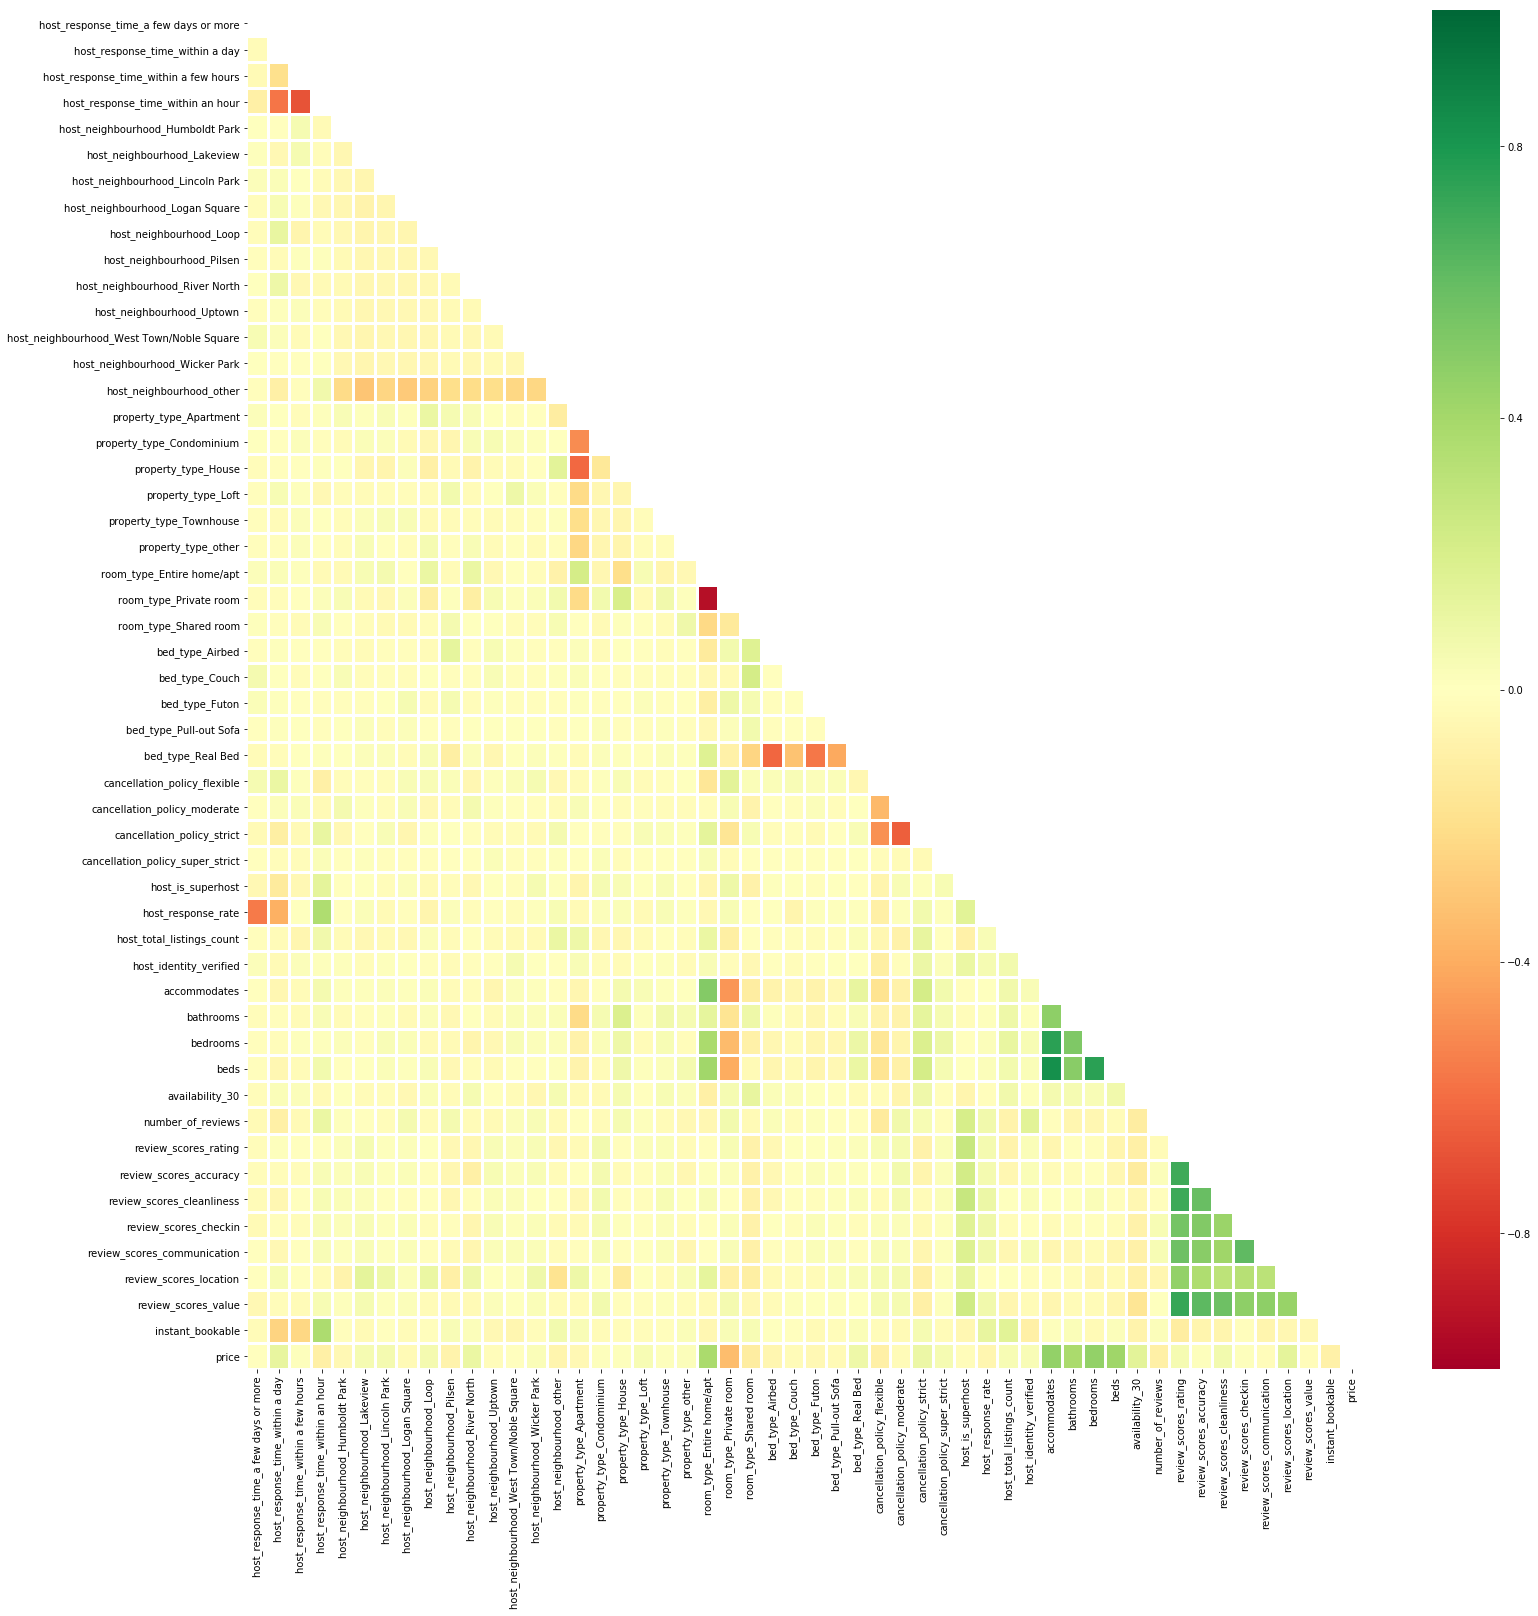

In [49]:
plt.figure(figsize=(25, 25))
# Create a mask to display only the lower triangle of the matrix
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df2.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
# cmap is a colormap. For more information, refer to http://matplotlib.org/examples/color/colormaps_reference.html

plt.yticks(rotation=0)
plt.xticks(rotation=90)

###### According to the correlation analysis, 
- number of bethrooms, number of bedrooms, number of beds, and accommodates has relatively significant to price;
- review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value are relatively significant to review score rating.

For instance, it seems the following variables are good predictors for price: accommodates, bethrooms, bedrooms, beds. But to make it clear, corelation analysis focusing on price and review_scores_rating is better. See below:

In [50]:
# paire-wise correlation involving 'price'
df2.corr(method='pearson')['price'].sort_values(ascending=False)

price                                        1.000000
bedrooms                                     0.457436
accommodates                                 0.455923
beds                                         0.418080
bathrooms                                    0.381887
room_type_Entire home/apt                    0.376574
availability_30                              0.147456
review_scores_location                       0.133550
host_response_time_within a day              0.121801
host_neighbourhood_River North               0.105226
cancellation_policy_strict                   0.100678
bed_type_Real Bed                            0.086527
review_scores_cleanliness                    0.065353
host_neighbourhood_Loop                      0.060804
host_neighbourhood_Lincoln Park              0.060638
host_neighbourhood_Lakeview                  0.052179
cancellation_policy_super_strict             0.051531
review_scores_rating                         0.048876
host_total_listings_count   

In [51]:
# paire-wise correlation involving 'review_scores_rating'
df2.corr(method='pearson')['review_scores_rating'].sort_values(ascending=False)

review_scores_rating                         1.000000
review_scores_value                          0.724876
review_scores_cleanliness                    0.704159
review_scores_accuracy                       0.701309
review_scores_communication                  0.571007
review_scores_checkin                        0.549537
review_scores_location                       0.456046
host_is_superhost                            0.265960
property_type_Condominium                    0.063660
host_response_rate                           0.054906
host_neighbourhood_Lakeview                  0.052207
price                                        0.048876
cancellation_policy_moderate                 0.048253
cancellation_policy_flexible                 0.045596
room_type_Private room                       0.041508
host_neighbourhood_Uptown                    0.036490
host_neighbourhood_Wicker Park               0.031306
cancellation_policy_super_strict             0.026172
property_type_Townhouse     

In [52]:
# paire-wise correlation involving 'review_scores_rating'
df2.corr(method='pearson')['host_is_superhost'].sort_values(ascending=False)

host_is_superhost                            1.000000
review_scores_cleanliness                    0.267478
review_scores_rating                         0.265960
review_scores_value                          0.235407
review_scores_accuracy                       0.223709
number_of_reviews                            0.207070
review_scores_communication                  0.174106
review_scores_checkin                        0.162532
host_response_rate                           0.154123
host_response_time_within an hour            0.136282
review_scores_location                       0.117217
host_identity_verified                       0.109259
room_type_Private room                       0.089007
host_neighbourhood_Wicker Park               0.052941
property_type_Condominium                    0.049076
cancellation_policy_super_strict             0.046302
property_type_House                          0.037745
cancellation_policy_moderate                 0.035374
property_type_Townhouse     

**As the correlation shows**, 
1. 'bedrooms,accommodates,beds' has the highest correlation with 'price'
2. 'review_scores_value, cleanliness and accuracy' are highly correlated with review_scores_rating'. 
 
To further detect/confirm the relationship and see whether they are statistically significant, we will use regression anlaysis, as follows.

 ## 4.3 Regression Analysis

##### Multiple Linear Regression analysis about price

Create design matrices for df2 -- with price as DV

In [54]:
# X2 =  df2 drop price; y2 = df2.price
X_price = df2.drop(['price','host_response_time_a few days or more','host_neighbourhood_other',
                   'property_type_other','room_type_Shared room','bed_type_Airbed',
                   'cancellation_policy_super_strict'],axis=1)
X_price['Intercept'] = 1
y_price = df2['price']

In [55]:
X_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 46 columns):
host_response_time_within a day              3748 non-null uint8
host_response_time_within a few hours        3748 non-null uint8
host_response_time_within an hour            3748 non-null uint8
host_neighbourhood_Humboldt Park             3748 non-null uint8
host_neighbourhood_Lakeview                  3748 non-null uint8
host_neighbourhood_Lincoln Park              3748 non-null uint8
host_neighbourhood_Logan Square              3748 non-null uint8
host_neighbourhood_Loop                      3748 non-null uint8
host_neighbourhood_Pilsen                    3748 non-null uint8
host_neighbourhood_River North               3748 non-null uint8
host_neighbourhood_Uptown                    3748 non-null uint8
host_neighbourhood_West Town/Noble Square    3748 non-null uint8
host_neighbourhood_Wicker Park               3748 non-null uint8
property_type_Apartment                      374

In [56]:
X_price.head()

host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      1   
3                                0                                      0   
4                                0                                      0   

   host_response_time_within an hour  host_neighbourhood_Humboldt Park  \
0                                  1                                 0   
1                                  1                                 0   
2                                  0                                 0   
3                                  1                                 0   
4                                  1                                 0   

   host_neighbourhood_Lakeview  host_neighbourhood_Lincoln Park  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   host_neighbourhood_Logan Square  host_neighbourhood_Loop  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   host_neighbourhood_Pilsen  host_neighbourhood_River North    ...      \
0                          0                               0    ...       
1                          0                               0    ...       
2                          0                               0    ...       
3                          0                               0    ...       
4                          0                               0    ...       

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                 25                  99.0                    10.0   
1                  4                  95.0                    10.0   
2                 12                  98.0                    10.0   
3                 96                  94.0                     9.0   
4                  1                 100.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                        9.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                  9.0   
4                         10.0                    10.0                 10.0   

   instant_bookable  Intercept  
0                 1          1  
1                 0          1  
2                 0          1  
3                 1          1  
4                 1          1  

[5 rows x 46 columns]

In [57]:
y_price.head()

0    56.0
1    80.0
2    80.0
3    20.0
4    28.0
Name: price, dtype: float64

Multiple linear regression for df2 -- non scaled

In [58]:
# Fit a full model
mod_full = sm.OLS(y_price,X_price).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     49.18
Date:                Fri, 04 May 2018   Prob (F-statistic):               0.00
Time:                        15:01:01   Log-Likelihood:                -22815.
No. Observations:                3748   AIC:                         4.572e+04
Df Residuals:                    3702   BIC:                         4.601e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
host_response_time_within a day              51.9642     31.243      1.663      0.096      -9.291     113.219
host_response_time_within a few hours        21.4270     32.534      0.659      0.510     -42.359      85.213
host_response_time_within an hour            11.4079     32.759      0.348      0.728     -52.820      75.635
host_neighbourhood_Humboldt Park            -19.3483      9.606     -2.014      0.044     -38.181      -0.515
host_neighbourhood_Lakeview                  21.9581      7.094      3.095      0.002       8.050      35.867
host_neighbourhood_Lincoln Park              20.1950      8.743      2.310      0.021       3.053      37.337
host_neighbourhood_Logan Square             -14.5858      7.494     -1.946      0.052     -29.278       0.106
host_neighbourhood_Loop                      12.1238      8.413      1.441      0.150      -4.370      28.618
host_neighbourhood_Pilsen                   -13.0540     10.245     -1.274      0.203     -33.141       7.033
host_neighbourhood_River North               55.9407     10.101      5.538      0.000      36.138      75.744
host_neighbourhood_Uptown                     8.8074     10.250      0.859      0.390     -11.289      28.904
host_neighbourhood_West Town/Noble Square   -10.1104      9.091     -1.112      0.266     -27.934       7.714
host_neighbourhood_Wicker Park               16.2850      9.070      1.796      0.073      -1.497      34.067
property_type_Apartment                      -9.1183     11.644     -0.783      0.434     -31.948      13.711
property_type_Condominium                    -7.7503     12.670     -0.612      0.541     -32.591      17.090
property_type_House                          -3.6659     12.338     -0.297      0.766     -27.856      20.524
property_type_Loft                           17.4801     16.856      1.037      0.300     -15.568      50.528
property_type_Townhouse                      -9.3014     17.225     -0.540      0.589     -43.072      24.470
room_type_Entire home/apt                    97.3677     11.392      8.547      0.000      75.033     119.703
room_type_Private room                       44.9570     11.077      4.059      0.000      23.240      66.674
bed_type_Couch                               21.8015     32.786      0.665      0.506     -42.478      86.081
bed_type_Futon                               31.6370     22.078      1.433      0.152     -11.649      74.923
bed_type_Pull-out Sofa                       -1.7208     26.989     -0.064      0.949     -54.635      51.193
bed_type_Real Bed                             7.8845     15.345      0.514      0.607     -22.200      37.969
cancellation_policy_flexible                -34.2590     44.427     -0.771      0.441    -121.363      52.845
can

We suppose that variables have p<0.05 is statistically significant.
We can see that there are 28 variables are statistically significant to price, among them,

**positive related** variables include: 'host_neighbourhood_River North','accommodates','bathrooms','bedrooms','availability_30','review_scores_rating', 'review_scores_cleanliness','review_scores_location'

**negative related** variables include: 'host_response_time_a few days or more','host_response_time_within an hour','host_neighbourhood_Humboldt Park','host_neighbourhood_Logan Square','host_neighbourhood_Plsen','host_neighbourhood_West Town/Noble Square','host_neighbourhood_other', 'property_type_Apartment', 'property_type_Condominium','property_type_House','room_type_Private room',"room_type_Shared room","bed_type_Airbed",'bed_type_Realbed',"cancellation+policy_flexible",'cancellation_policy_moderate','cancellation_policy_strict','host_total_listings_count', 'number_of_reviews','review_scores_value'

Using review_scores_rating as example, it has a positive effect on Price. Increasing 1 unit in score would increase price by 1.3918 units after controlling for other factors. The positive effect of review score rating on price is statistically significant (P<0.05)

##### Multiple Linear Regression analysis about review_scores_rating

In [60]:
X_review = df2.drop(['review_scores_rating','host_response_time_a few days or more','host_neighbourhood_other',
                     'property_type_other','room_type_Shared room','bed_type_Airbed',
                     'cancellation_policy_super_strict'],axis=1)
X_review['Intercept'] = 1
y_review = df2['review_scores_rating']

In [61]:
X_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 46 columns):
host_response_time_within a day              3748 non-null uint8
host_response_time_within a few hours        3748 non-null uint8
host_response_time_within an hour            3748 non-null uint8
host_neighbourhood_Humboldt Park             3748 non-null uint8
host_neighbourhood_Lakeview                  3748 non-null uint8
host_neighbourhood_Lincoln Park              3748 non-null uint8
host_neighbourhood_Logan Square              3748 non-null uint8
host_neighbourhood_Loop                      3748 non-null uint8
host_neighbourhood_Pilsen                    3748 non-null uint8
host_neighbourhood_River North               3748 non-null uint8
host_neighbourhood_Uptown                    3748 non-null uint8
host_neighbourhood_West Town/Noble Square    3748 non-null uint8
host_neighbourhood_Wicker Park               3748 non-null uint8
property_type_Apartment                      374

In [62]:
X_review.head()

host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      1   
3                                0                                      0   
4                                0                                      0   

   host_response_time_within an hour  host_neighbourhood_Humboldt Park  \
0                                  1                                 0   
1                                  1                                 0   
2                                  0                                 0   
3                                  1                                 0   
4                                  1                                 0   

   host_neighbourhood_Lakeview  host_neighbourhood_Lincoln Park  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   host_neighbourhood_Logan Square  host_neighbourhood_Loop  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   host_neighbourhood_Pilsen  host_neighbourhood_River North    ...      \
0                          0                               0    ...       
1                          0                               0    ...       
2                          0                               0    ...       
3                          0                               0    ...       
4                          0                               0    ...       

   number_of_reviews  review_scores_accuracy  review_scores_cleanliness  \
0                 25                    10.0                       10.0   
1                  4                    10.0                       10.0   
2                 12                    10.0                       10.0   
3                 96                     9.0                        9.0   
4                  1                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                    10.0   
3                   10.0                         10.0                    10.0   
4                   10.0                         10.0                    10.0   

   review_scores_value  instant_bookable  price  Intercept  
0                 10.0                 1   56.0          1  
1                 10.0                 0   80.0          1  
2                 10.0                 0   80.0          1  
3                  9.0                 1   20.0          1  
4                 10.0                 1   28.0          1  

[5 rows x 46 columns]

In [63]:
y_review.head()

0     99.0
1     95.0
2     98.0
3     94.0
4    100.0
Name: review_scores_rating, dtype: float64

In [64]:
# Fit a full model
mod_full = sm.OLS(y_review,X_review).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.736
Model:                              OLS   Adj. R-squared:                  0.732
Method:                   Least Squares   F-statistic:                     228.9
Date:                  Fri, 04 May 2018   Prob (F-statistic):               0.00
Time:                          15:07:34   Log-Likelihood:                -9535.2
No. Observations:                  3748   AIC:                         1.916e+04
Df Residuals:                      3702   BIC:                         1.945e+04
Df Model:                            45                                         
Covariance Type:              nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
host_response_time_within a day               0.1901      0.904      0.210      0.833      -1.582       1.962
host_response_time_within a few hours        -0.1313      0.941     -0.140      0.889      -1.976       1.714
host_response_time_within an hour            -0.2445      0.947     -0.258      0.796      -2.102       1.613
host_neighbourhood_Humboldt Park              0.2889      0.278      1.040      0.299      -0.256       0.834
host_neighbourhood_Lakeview                   0.1448      0.205      0.705      0.481      -0.258       0.548
host_neighbourhood_Lincoln Park              -0.1475      0.253     -0.583      0.560      -0.644       0.349
host_neighbourhood_Logan Square               0.0862      0.217      0.398      0.691      -0.339       0.511
host_neighbourhood_Loop                       0.2838      0.243      1.166      0.244      -0.193       0.761
host_neighbourhood_Pilsen                     0.4348      0.296      1.467      0.142      -0.146       1.016
host_neighbourhood_River North               -0.3757      0.293     -1.281      0.200      -0.951       0.199
host_neighbourhood_Uptown                     0.0751      0.296      0.253      0.800      -0.506       0.656
host_neighbourhood_West Town/Noble Square    -0.0005      0.263     -0.002      0.998      -0.516       0.515
host_neighbourhood_Wicker Park               -0.1460      0.262     -0.557      0.578      -0.661       0.368
property_type_Apartment                       0.2427      0.337      0.721      0.471      -0.418       0.903
property_type_Condominium                     0.1820      0.366      0.497      0.619      -0.536       0.900
property_type_House                           0.2971      0.357      0.833      0.405      -0.402       0.997
property_type_Loft                            1.1583      0.487      2.378      0.017       0.203       2.114
property_type_Townhouse                       0.0541      0.498      0.109      0.913      -0.923       1.031
room_type_Entire home/apt                    -0.2550      0.333     -0.766      0.443      -0.907       0.397
room_type_Private room                        0.0015      0.321      0.005      0.996      -0.628       0.631
bed_type_Couch                                1.2167      0.948      1.283      0.199      -0.642       3.075
bed_type_Futon                                0.4798      0.639      0.751      0.453      -0.772       1.732
bed_type_Pull-out Sofa                        0.2762      0.781      0.354      0.723      -1.254       1.806
bed_type_Real Bed                             0.6651      0.444      1.499      0.134      -0.205       1.535
cancellation_policy_flexible                 -0.2840      1.285     -0.221      0.825      

We suppose that variables have p<0.05 is statistically significant.
We can see that there are 14 variables are statistically significant to price, among them,

**positively related** variables include: 'host_is_superhost', 'bathrooms', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price'.

**negatively related** variables include: 'host_neighbourhood_River North', 'property_type_Apartment', 'property_type_Condominium', 'property_type_other', 'room_type_Entire home/apt', 'bed_type_Airbed', 'cancellation_policy_moderate', 'host_total_listings_count', 'beds', 'number_of_reviews', 'instant_bookable'.

Using 'number of reviews' as example, it has a negative effect on review score rating. Increasing 1 unit in number of reviews would decrease review score by 0.0049 units after controlling for other factors. The negative effect of review number on price is statistically significant (P<0.05).

##### Multiple Linear Regression analysis about review_score_location , neighbourhood and superhost


In [65]:
# Create design matrices
#Xloc = df2.iloc[:,'host_neighbourhood':'host_is_superhost']
Xloc = df2[['host_neighbourhood_Lakeview','host_neighbourhood_Logan Square','host_neighbourhood_Loop',
            'host_neighbourhood_Lincoln Park','host_neighbourhood_Wicker Park',
            'host_neighbourhood_West Town/Noble Square',
            'host_neighbourhood_River North','host_neighbourhood_Humboldt Park','host_neighbourhood_Uptown',
            'host_neighbourhood_Pilsen', 'host_is_superhost']]
yloc = df2['review_scores_location']

In [66]:
Xloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 11 columns):
host_neighbourhood_Lakeview                  3748 non-null uint8
host_neighbourhood_Logan Square              3748 non-null uint8
host_neighbourhood_Loop                      3748 non-null uint8
host_neighbourhood_Lincoln Park              3748 non-null uint8
host_neighbourhood_Wicker Park               3748 non-null uint8
host_neighbourhood_West Town/Noble Square    3748 non-null uint8
host_neighbourhood_River North               3748 non-null uint8
host_neighbourhood_Humboldt Park             3748 non-null uint8
host_neighbourhood_Uptown                    3748 non-null uint8
host_neighbourhood_Pilsen                    3748 non-null uint8
host_is_superhost                            3748 non-null int64
dtypes: int64(1), uint8(10)
memory usage: 65.9 KB


In [67]:
yloc.head()

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: review_scores_location, dtype: float64

In [68]:
# Fit a full model
mod_full = sm.OLS(yloc,Xloc).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     review_scores_location   R-squared:                       0.573
Model:                                OLS   Adj. R-squared:                  0.572
Method:                     Least Squares   F-statistic:                     455.5
Date:                    Fri, 04 May 2018   Prob (F-statistic):               0.00
Time:                            15:10:05   Log-Likelihood:                -12209.
No. Observations:                    3748   AIC:                         2.444e+04
Df Residuals:                        3737   BIC:                         2.451e+04
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
host_neighbourhood_Lakeview                   8.0092      0.387     20.707      0.000       7.251       8.768
host_neighbourhood_Logan Square               7.4931      0.416     18.029      0.000       6.678       8.308
host_neighbourhood_Loop                       8.4072      0.456     18.447      0.000       7.514       9.301
host_neighbourhood_Lincoln Park               8.2986      0.487     17.039      0.000       7.344       9.253
host_neighbourhood_Wicker Park                7.2454      0.513     14.132      0.000       6.240       8.251
host_neighbourhood_West Town/Noble Square     7.8804      0.509     15.488      0.000       6.883       8.878
host_neighbourhood_River North                8.7153      0.551     15.805      0.000       7.634       9.796
host_neighbourhood_Humboldt Park              7.4047      0.543     13.629      0.000       6.340       8.470
host_neighbourhood_Uptown                     7.5925      0.583     13.018      0.000       6.449       8.736
host_neighbourhood_Pilsen                     7.5465      0.572     13.182      0.000       6.424       8.669
host_is_superhost                             6.2916      0.201     31.288      0.000       5.897       6.686
==============================================================================
Omnibus:                      610.594   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.199
Skew:                          -0.253   Prob(JB):                     2.46e-38
Kurtosis:                       2.076   Cond. No.                         3.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables are statistically significant, and positively contribute to the review score of clearliness.

##### Multiple Linear Regression analysis about superhost

In [69]:
X_host = df2.drop(['host_is_superhost','host_response_time_a few days or more','host_neighbourhood_other',
                   'property_type_other','room_type_Shared room','bed_type_Airbed',
                   'cancellation_policy_super_strict'],axis=1)

X_host['Intercept'] = 1
y_host = df2['host_is_superhost']

In [70]:
X_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 46 columns):
host_response_time_within a day              3748 non-null uint8
host_response_time_within a few hours        3748 non-null uint8
host_response_time_within an hour            3748 non-null uint8
host_neighbourhood_Humboldt Park             3748 non-null uint8
host_neighbourhood_Lakeview                  3748 non-null uint8
host_neighbourhood_Lincoln Park              3748 non-null uint8
host_neighbourhood_Logan Square              3748 non-null uint8
host_neighbourhood_Loop                      3748 non-null uint8
host_neighbourhood_Pilsen                    3748 non-null uint8
host_neighbourhood_River North               3748 non-null uint8
host_neighbourhood_Uptown                    3748 non-null uint8
host_neighbourhood_West Town/Noble Square    3748 non-null uint8
host_neighbourhood_Wicker Park               3748 non-null uint8
property_type_Apartment                      374

In [71]:
X_host.head()

host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      1   
3                                0                                      0   
4                                0                                      0   

   host_response_time_within an hour  host_neighbourhood_Humboldt Park  \
0                                  1                                 0   
1                                  1                                 0   
2                                  0                                 0   
3                                  1                                 0   
4                                  1                                 0   

   host_neighbourhood_Lakeview  host_neighbourhood_Lincoln Park  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   host_neighbourhood_Logan Square  host_neighbourhood_Loop  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   host_neighbourhood_Pilsen  host_neighbourhood_River North    ...      \
0                          0                               0    ...       
1                          0                               0    ...       
2                          0                               0    ...       
3                          0                               0    ...       
4                          0                               0    ...       

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  99.0                    10.0                       10.0   
1                  95.0                    10.0                       10.0   
2                  98.0                    10.0                       10.0   
3                  94.0                     9.0                        9.0   
4                 100.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                    10.0   
3                   10.0                         10.0                    10.0   
4                   10.0                         10.0                    10.0   

   review_scores_value  instant_bookable  price  Intercept  
0                 10.0                 1   56.0          1  
1                 10.0                 0   80.0          1  
2                 10.0                 0   80.0          1  
3                  9.0                 1   20.0          1  
4                 10.0                 1   28.0          1  

[5 rows x 46 columns]

In [72]:
y_host.head()

0    1
1    0
2    1
3    0
4    0
Name: host_is_superhost, dtype: int64

##### Logistic Regression analysis about superhost

In [74]:
# Describe the logistic model
mod_log = sm.Logit(y_host,X_host)

# Fit model
fit_log = mod_log.fit()

# Summarize model
fit_log.summary2()

Optimization terminated successfully.
         Current function value: 0.477355
         Iterations 25


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
=========================================================================================================
Model:                            Logit                          No. Iterations:                25.0000  
Dependent Variable:               host_is_superhost              Pseudo R-squared:              0.221    
Date:                             2018-05-04 15:15               AIC:                           3670.2494
No. Observations:                 3748                           BIC:                           3956.7824
Df Model:                         45                             Log-Likelihood:                -1789.1  
Df Residuals:                     3702                           LL-Null:                       -2296.8  
Converged:                        1.0000                         Scale:                         1.0000   
---------------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------------------------------------
host_response_time_within a day            33.0946 2126892.9047  0.0000 1.0000 -4168600.3977 4168666.5868
host_response_time_within a few hours      33.2617 2126892.9047  0.0000 1.0000 -4168600.2306 4168666.7539
host_response_time_within an hour          33.7346 2126892.9047  0.0000 1.0000 -4168599.7577 4168667.2268
host_neighbourhood_Humboldt Park           -0.1083       0.2177 -0.4976 0.6187       -0.5350       0.3184
host_neighbourhood_Lakeview                -0.2994       0.1613 -1.8555 0.0635       -0.6156       0.0169
host_neighbourhood_Lincoln Park            -0.3387       0.2086 -1.6234 0.1045       -0.7476       0.0702
host_neighbourhood_Logan Square             0.0518       0.1707  0.3036 0.7614       -0.2828       0.3865
host_neighbourhood_Loop                    -0.0087       0.2092 -0.0415 0.9669       -0.4187       0.4013
host_neighbourhood_Pilsen                   0.0249       0.2487  0.1000 0.9203       -0.4625       0.5123
host_neighbourhood_River North             -0.1764       0.2642 -0.6677 0.5043       -0.6942       0.3414
host_neighbourhood_Uptown                  -0.0816       0.2303 -0.3544 0.7231       -0.5330       0.3698
host_neighbourhood_West Town/Noble Square  -0.3824       0.2093 -1.8268 0.0677       -0.7927       0.0279
host_neighbourhood_Wicker Park              0.3720       0.2000  1.8597 0.0629       -0.0201       0.7640
property_type_Apartment                    -0.2600       0.2810 -0.9255 0.3547       -0.8107       0.2906
property_type_Condominium                  -0.0819       0.3010 -0.2721 0.7855       -0.6719       0.5081
property_type_House                        -0.1306       0.2960 -0.4412 0.6591       -0.7107       0.4495
property_type_Loft                          0.0067       0.3988  0.0168 0.9866       -0.7749       0.7883
property_type_Townhouse                     0.0173       0.3878  0.0446 0.9644       -0.7428       0.7774
room_type_Entire home/apt                   0.8514       0.3606  2.3609 0.0182        0.1446       1.5582
room_type_Private room                      1.1773       0.3535  3.3305 0.0009        0.4845       1.8701
bed_type_Couch                              0.6822       0.7916  0.8618 0.3888       -0.8693       2.2336
bed_type_Futon                             -1.0189       0.5378 -1.8946 0.0581       -2.0729       0.0351
bed_type_Pull-out Sofa                     -0.4199       0.6167 -0.6809 0.4960       -1.6287       0.7888
bed_type_Real Bed                          -0.5473       0.3739 -1.4638 0.1433       -1.2802       0.1855
cancellation_policy_flexible               -1.9111       1.1118 -1.7189 0.0856       -4.0902       0.2680
cancellation_policy_moderate               -1.7048       1.1088 -1.5375 0.1

# 5. Data Visualization

The following analysis will focus on price and review score and how the categorical variables influence on them. Based on that, we will choose the most important variables and include them in the predictive model in milestone 3. 

## 5.1 Host Identity: Verified Or Not?

In [75]:
Frequency_of_host_identity_verified=pd.crosstab(index=df2['host_identity_verified'],columns="count")
Frequency_of_host_identity_verified

col_0                   count
host_identity_verified       
0                         672
1                        3076

In [76]:
Relative_Frequency_of_host_identity_verified=pd.crosstab(index=df2['host_identity_verified'],columns="Percent")/pd.crosstab(index=df2['host_identity_verified'],columns="Percent").sum()
Relative_Frequency_of_host_identity_verified

col_0                    Percent
host_identity_verified          
0                       0.179296
1                       0.820704

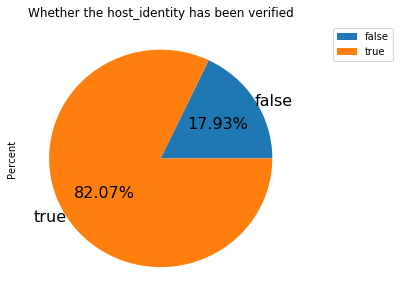

In [77]:
Relative_Frequency_of_host_identity_verified['Percent'].plot(kind='pie',legend = True, labeldistance=1, 
                                                  autopct='%.2f%%', fontsize=16,figsize=(5,5),
                                                             labels = ['false','true']
                                                  )

plt.legend(bbox_to_anchor=(1.1,1), loc="upper left")
plt.title('Whether the host_identity has been verified')
plt.show()

Host whose identity has been verified occupies 82.07%
Correlation analysis and regression have proved that host identity is not relavant to price and review score, but contribute to whether the host is a superhost.

[Text(0,0,'false'), Text(0,0,'true')]

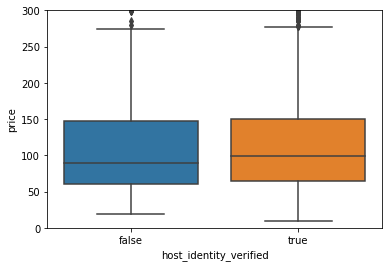

In [78]:
# see the range of price for different groups of hosts
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='host_identity_verified', y='price')
plt.ylim(0, 300)
ax.set_xticklabels(('false', 'true'))

[Text(0,0,'false'), Text(0,0,'true')]

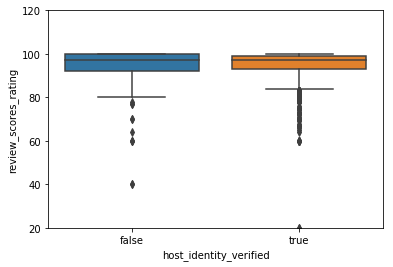

In [79]:
# see the range of review score for different groups of hosts
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='host_identity_verified', y='review_scores_rating')
plt.ylim(20, 120)
ax.set_xticklabels(('false', 'true'))

In [80]:
# calculate and compare the mean price mand mean review scores rating between different host
df_identity = df1[['host_identity_verified','host_is_superhost']].groupby('host_identity_verified').count()
df_identity

host_is_superhost
host_identity_verified                   
f                                    1114
t                                    4093

[Text(0,0,'false'), Text(0,0,'true')]

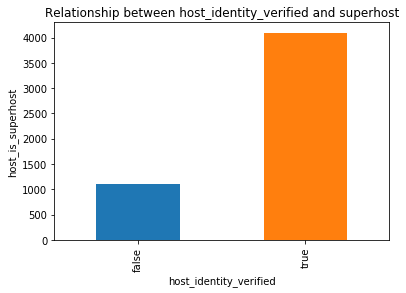

In [81]:
# relationship between 'host_identity_verified' and 'review score'
fig, ax = plt.subplots()
df_identity['host_is_superhost'].plot(kind='bar', legend = False)
plt.ylabel('host_is_superhost')
plt.title('Relationship between host_identity_verified and superhost')
ax.set_xticklabels(('false', 'true'))

##### Whether host identity has been verified or not didn't have significant influence on the  review score and price. Further, it is surprising to find over 20% hosts' identies haven't been verifies. For the safty and satisfaction of guests, Airbnb should and must verify every host's identity. 

## 5.2 Does Instant Book Matter?

In [82]:
# count how many rooms are instant bookable
Frequency_of_instant_bookable=pd.crosstab(index=df2['instant_bookable'],columns="count")
Frequency_of_instant_bookable

col_0             count
instant_bookable       
0                  2636
1                  1112

In [83]:
Relative_Frequency_of_instant_bookable=pd.crosstab(index=df2['instant_bookable'],columns="Percent")/pd.crosstab(index=df2['instant_bookable'],columns="Percent").sum()
Relative_Frequency_of_instant_bookable

col_0              Percent
instant_bookable          
0                 0.703308
1                 0.296692

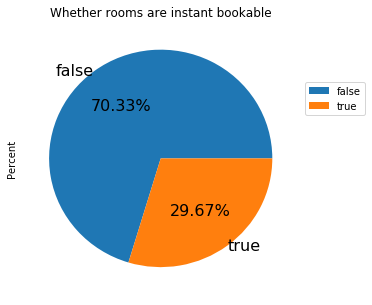

In [84]:
Relative_Frequency_of_instant_bookable['Percent'].plot(kind='pie',legend = True, labeldistance=1, 
                                                  autopct='%.2f%%', fontsize=16,figsize=(5,5),labels = ['false','true']
                                                  )

plt.legend(bbox_to_anchor=(1,0.8), loc="upper left")
plt.xlabel('')
plt.title('Whether rooms are instant bookable')
plt.show()

[Text(0,0,'false'), Text(0,0,'true')]

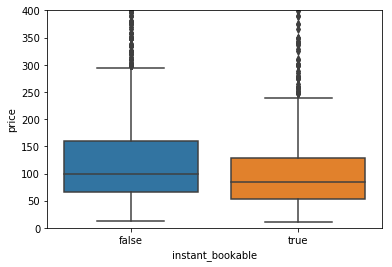

In [85]:
# using boxplot to show the price range of different instant_bookable
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='instant_bookable', y='price')
plt.ylim(0, 400)
ax.set_xticklabels(('false', 'true'))

[Text(0,0,'false'), Text(0,0,'true')]

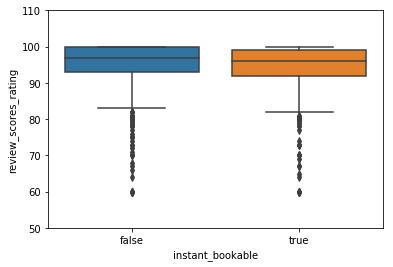

In [86]:
# using boxplot to show the review score range of different instant_bookable
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='instant_bookable', y='review_scores_rating')
plt.ylim(50, 110)
ax.set_xticklabels(('false', 'true'))

In [87]:
df_book = df2[['instant_bookable','host_is_superhost']].groupby('instant_bookable').count()
df_book

host_is_superhost
instant_bookable                   
0                              2636
1                              1112

[Text(0,0,'false'), Text(0,0,'true')]

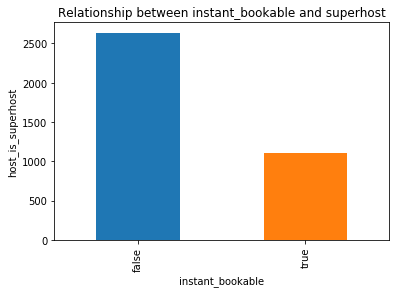

In [88]:
# relationship between 'host_identity_verified' and superhost
fig, ax = plt.subplots()
df_book['host_is_superhost'].plot(kind='bar', legend = False)
plt.ylabel('host_is_superhost')
plt.title('Relationship between instant_bookable and superhost')
ax.set_xticklabels(('false', 'true'))

##### Instant book was introduced to make the booking process faster without waiting for hosts' approval. Hotels do a much better job than Airbnb on booking as long as the room is available. <font color=purple> On average, the instant bookable listings have relatively lower prices and lower review scores. The reason might be that instant_bookable room are not very popular, so most time they are available, a second reason might be that those hosts don't spend enough time to clean and organize the room.

## 5.3 Is Superhost A Real Superstar?

In [89]:
# count host_is_superhost 
Frequency_of_host_is_superhost=pd.crosstab(index=df2['host_is_superhost'],columns="count")
Frequency_of_host_is_superhost

col_0              count
host_is_superhost       
0                   2615
1                   1133

In [90]:
Relative_Frequency_of_host_is_superhost=pd.crosstab(index=df2['host_is_superhost'],columns="Percent")/pd.crosstab(index=df2['instant_bookable'],columns="Percent").sum()
Relative_Frequency_of_host_is_superhost

col_0               Percent
host_is_superhost          
0                  0.697705
1                  0.302295

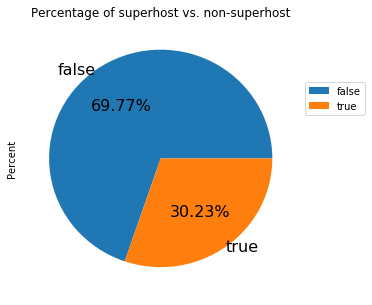

In [91]:
Relative_Frequency_of_host_is_superhost['Percent'].plot(kind='pie',legend = True, labeldistance=1, 
                                                  autopct='%.2f%%', fontsize=16,figsize=(5,5),labels = ['false','true']
                                                  )

plt.legend(bbox_to_anchor=(1,0.8), loc="upper left")
plt.xlabel('')
plt.title('Percentage of superhost vs. non-superhost')
plt.show()

[Text(0,0,'false'), Text(0,0,'true')]

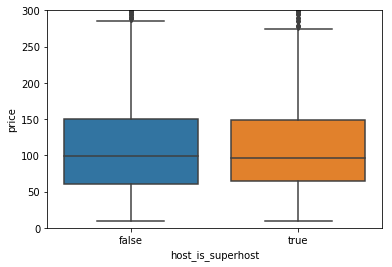

In [92]:
# using boxplot to show the price range of superhost and not-superhost
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='host_is_superhost', y='price')
plt.ylim(0, 300)
ax.set_xticklabels(('false', 'true'))

[Text(0,0,'false'), Text(0,0,'true')]

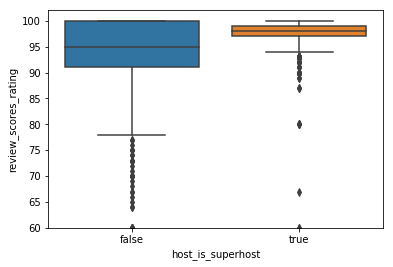

In [93]:
# using boxplot to show the review score range of superhost and not-superhost
fig, ax = plt.subplots()
sns.boxplot(data=df2, x='host_is_superhost', y='review_scores_rating')
plt.ylim(60, 102)
ax.set_xticklabels(('false', 'true'))

##### In general, superhosts provide much better services in charging lower prices but receiving higher review scores. We would recommend customers book listings from superhosts. We also suggest Airbnb provides effective incentives to convert non-superhost to superhost, e.g. additional bonus for superhost. 

## 5.4 Property Types and Their Relationship with Price and Review Scores

In [94]:
Frequency_of_Property_Type=pd.crosstab(index=df1_nonnull['property_type'],columns="count")
Frequency_of_Property_Type

col_0          count
property_type       
Apartment       2539
Condominium      400
House            568
Loft              78
Townhouse         71
other             92

In [95]:
Relative_Frequency_of_Property_Type=pd.crosstab(index=df1_nonnull['property_type'],columns="Percent")/pd.crosstab(index=df1_nonnull['property_type'],columns="Percent").sum()
Top5_property_type = Relative_Frequency_of_Property_Type.sort_values('Percent',ascending=False).head(5)

In [96]:
Top5_property_type

col_0           Percent
property_type          
Apartment      0.677428
House          0.151547
Condominium    0.106724
other          0.024546
Loft           0.020811

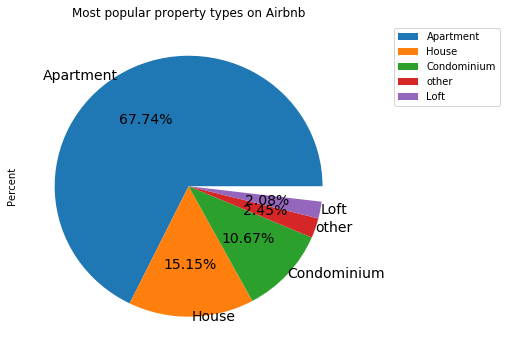

In [97]:
# pie chart
Top5_property_type['Percent'].plot(kind='pie',legend = True, labeldistance=1, 
                                                  autopct='%.2f%%', fontsize=14,figsize=(6,6),
                                                 )

plt.legend(bbox_to_anchor=(1.1,1), loc="upper left")
plt.title('Most popular property types on Airbnb')
plt.show()


In [98]:
df_property = df1_nonnull[['property_type','price',
                   'review_scores_rating']].groupby('property_type').mean()
df_property

price  review_scores_rating
property_type                                  
Apartment      123.733753             94.940528
Condominium    131.842500             96.187500
House          131.422535             94.899648
Loft           163.538462             95.730769
Townhouse      141.591549             96.154930
other          142.510870             94.010870

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

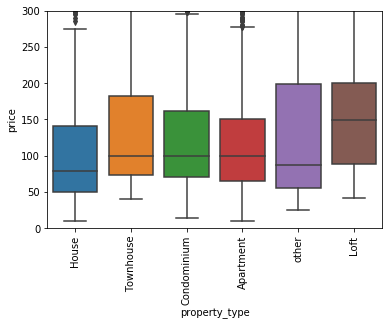

In [99]:
# using boxplot to show the price range of property type
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='property_type', y='price')
plt.ylim(0, 300)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

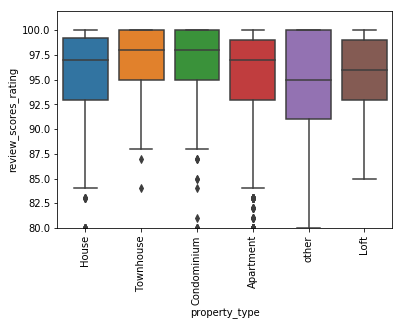

In [100]:
# using boxplot to show the review score range of property type
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='property_type', y='review_scores_rating')
plt.ylim(80, 102)
plt.xticks(rotation=90)

In [101]:
df_pro = df1_nonnull[['property_type','host_is_superhost']].groupby('property_type').count()
df_pro

host_is_superhost
property_type                   
Apartment                   2539
Condominium                  400
House                        568
Loft                          78
Townhouse                     71
other                         92

Text(0.5,1,'Relationship between host_is_superhost and property type')

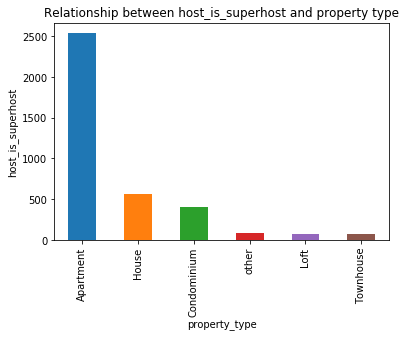

In [102]:
# relationship between 'host_identity_verified' and superhost
fig, ax = plt.subplots()
df_pro['host_is_superhost'].sort_values(ascending=False).plot(kind='bar', legend = False)
plt.ylabel('host_is_superhost')
plt.title('Relationship between host_is_superhost and property type')


##### Overall, the Airbnb customer satisfaction is high (measured by review scores) in the high end of lodging market (measured by price). Eventhough boat, vacation home, and timeshare charge the top 3 highest prices, their review scores are still great. However, we should notice that the apartment, house, and condominium together represent 93.55% of all the property types in Chicago. But their review scores are not good enough. 

## 5.5 Cancellation Policy: Strict Or Flexible?

In [103]:
# Frequency Table of Cancellation Policy
Frequency_of_cancellation_policy=pd.crosstab(index=df1_nonnull['cancellation_policy'],columns="count")
Frequency_of_cancellation_policy

col_0                count
cancellation_policy       
flexible               790
moderate              1193
strict                1759
super_strict             6

In [104]:
# Relative Frequency Table of Cancellation Policy
Relative_Frequency_of_cancellation_policy=pd.crosstab(index=df1_nonnull['cancellation_policy'],columns="Percent")/pd.crosstab(index=df1_nonnull['cancellation_policy'],columns="Percent").sum()
Relative_Frequency_of_cancellation_policy

col_0                 Percent
cancellation_policy          
flexible             0.210779
moderate             0.318303
strict               0.469317
super_strict         0.001601

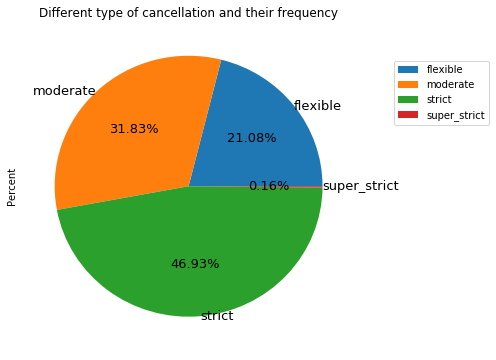

In [105]:
Relative_Frequency_of_cancellation_policy['Percent'].plot(kind='pie',legend = True, labeldistance=1, 
                                                  autopct='%.2f%%', fontsize=13,figsize=(6,6),
                                                  )

plt.legend(bbox_to_anchor=(1.1,0.9), loc="upper left")
plt.title('Different type of cancellation and their frequency')
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

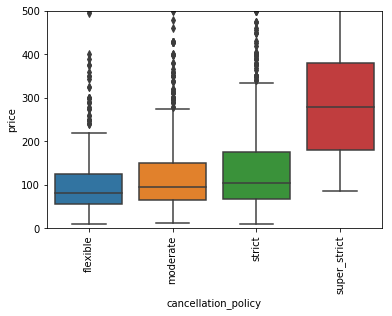

In [106]:
# using boxplot to show the price range of property type
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='cancellation_policy', y='price')
plt.ylim(0, 500)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

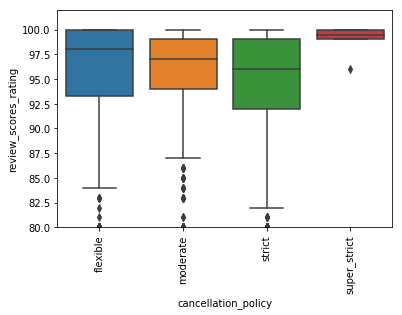

In [107]:
# using boxplot to show the review score range of property type
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='cancellation_policy', y='review_scores_rating')
plt.ylim(80, 102)
plt.xticks(rotation=90)

In [108]:
df_can = df1_nonnull[['cancellation_policy','host_is_superhost']].groupby('cancellation_policy').count()
df_can

host_is_superhost
cancellation_policy                   
flexible                           790
moderate                          1193
strict                            1759
super_strict                         6

Text(0.5,1,'Relationship between host_identity_verified and cancellation rule')

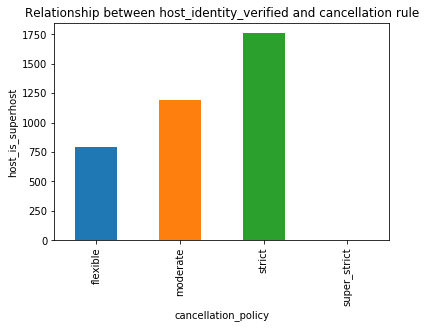

In [109]:
# relationship between 'host_identity_verified' and superhost
fig, ax = plt.subplots()
df_can['host_is_superhost'].plot(kind='bar', legend = False)
plt.ylabel('host_is_superhost')
plt.title('Relationship between host_identity_verified and cancellation rule')

##### Super strict cancellation policy is related to highest average price but also highest review score. Strict cancellation policy has the second highest average price but the lowest review score. Moderate cancellation policy gives the lowest price but second highest review score. Therefore, we would recommend the listings with moderate cancellation policy to customers having limited budget. 

## 5.6 Top 10 Neighbourhoods: Location! Location! Location!

In [110]:
# relationship between price and host_neighbourhood
df_neighbour = df1_nonnull[['price','review_scores_rating','host_neighbourhood']]
df_neighbour.head()

price  review_scores_rating host_neighbourhood
0   56.0                  99.0              other
1   80.0                  95.0              other
2   80.0                  98.0              other
3   20.0                  94.0              other
4   28.0                 100.0              other

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

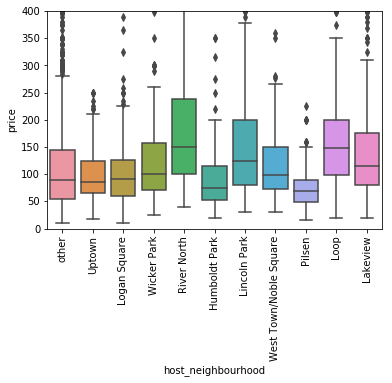

In [111]:
# using boxplot to show the price range of neighbourhood
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='host_neighbourhood', y='price')
plt.ylim(0, 400)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

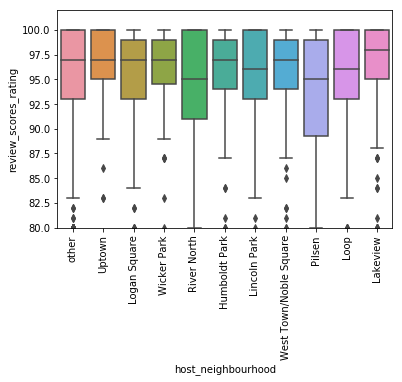

In [112]:
# using boxplot to show the review score range of neighbourhood
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='host_neighbourhood', y='review_scores_rating')
plt.ylim(80, 102)
plt.xticks(rotation=90)

In [113]:
df_nei = df1_nonnull[['host_neighbourhood','host_is_superhost']].groupby('host_neighbourhood').count()
df_nei

host_is_superhost
host_neighbourhood                       
Humboldt Park                         136
Lakeview                              272
Lincoln Park                          169
Logan Square                          236
Loop                                  193
Pilsen                                122
River North                           131
Uptown                                118
West Town/Noble Square                155
Wicker Park                           155
other                                2061

(0, 350)

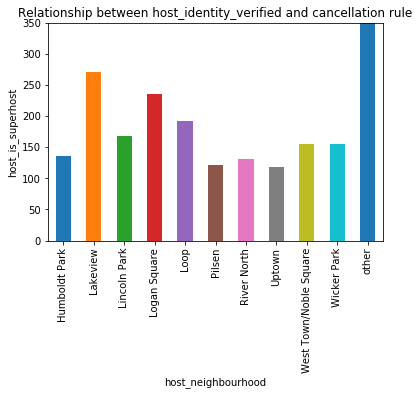

In [114]:
# relationship between neighbourhood and superhost
fig, ax = plt.subplots()
df_nei['host_is_superhost'].plot(kind='bar', legend = False)
plt.ylabel('host_is_superhost')
plt.title('Relationship between host_identity_verified and cancellation rule')
plt.ylim(0, 350)

#####  <font color=red > need to be revised <font color=black>We will not recommend the rooms in River North neighbourhood since they are not close to popular attractions yet charge the highest average price and receive worst reviews. On the contrary, Uptown provides the best value to customers based on its highest review score but relatively low average price. Lakeview and Wicker park are good choices for those tourists with more budgets. 

## 5.7 Host Response Time: The Sooner, The Better?

In [115]:
# Frequency Table of host_response_time
Frequency_of_response=pd.crosstab(index=df1_nonnull['host_response_time'],columns="count")
Frequency_of_response.sort_values('count',ascending=False).head()

col_0               count
host_response_time       
within an hour       2524
within a few hours    693
within a day          513
a few days or more     18

In [116]:
Relative_Frequency_of_response=pd.crosstab(index=df1_nonnull['host_response_time'],columns="Percent")/pd.crosstab(index=df1_nonnull['host_response_time'],columns="Percent").sum()
Relative_Frequency_of_response.sort_values('Percent',ascending=False).head(5)

col_0                Percent
host_response_time          
within an hour      0.673426
within a few hours  0.184899
within a day        0.136873
a few days or more  0.004803

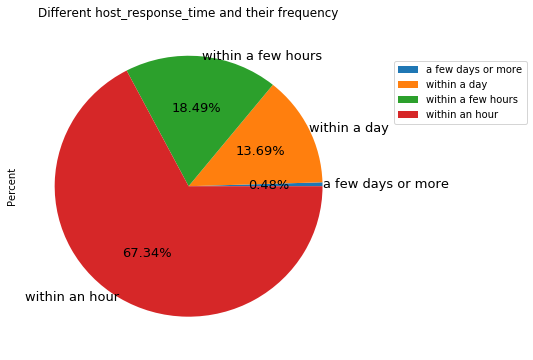

In [117]:
Relative_Frequency_of_response['Percent'].plot(kind='pie',legend = True, labeldistance=1, 
                                                  autopct='%.2f%%', fontsize=13,figsize=(6,6),)
plt.legend(bbox_to_anchor=(1.1,0.9), loc="upper left")
plt.title('Different host_response_time and their frequency')
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

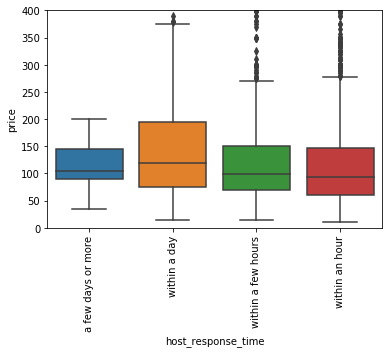

In [118]:
# using boxplot to show the price range of host_response_time
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='host_response_time', y='price')
plt.ylim(0, 400)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

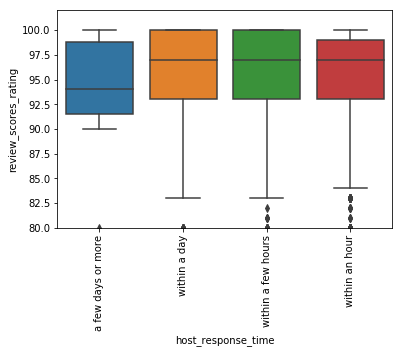

In [119]:
# using boxplot to show the review score range of host_response_time
fig, ax = plt.subplots()
sns.boxplot(data=df1_nonnull, x='host_response_time', y='review_scores_rating')
plt.ylim(80, 102)
plt.xticks(rotation=90)

In [120]:
df_res = df1_nonnull[['host_response_time','host_is_superhost']].groupby('host_response_time').count()
df_res

host_is_superhost
host_response_time                   
a few days or more                 18
within a day                      513
within a few hours                693
within an hour                   2524

Text(0.5,1,'Relationship between host_identity_verified and response time')

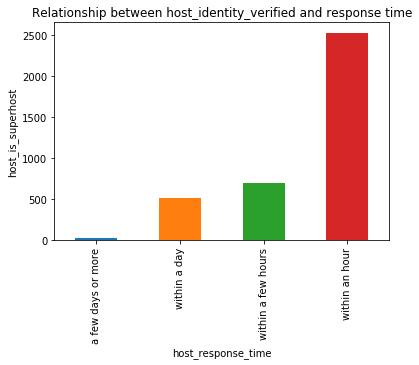

In [121]:
# relationship between neighbourhood and superhost
fig, ax = plt.subplots()
df_res['host_is_superhost'].plot(kind='bar', legend = False)
plt.ylabel('host_is_superhost')
plt.title('Relationship between host_identity_verified and response time')

###### The review scores don't change much when Airbnb hosts response within an hour, a few hours, or a day. But the guests are less satisfied if the hosts take longer than a day to reply them.  

## 5.8 Different Day of Week With Different Listing Supplies And Prices?

In [122]:
price_dayofweek=calendar_available[['price','dayofweek']]
price_dayofweek.sample(5)


price  dayofweek
833975   161.0  Wednesday
990841   155.0  Wednesday
1455815  195.0  Wednesday
332609    65.0     Sunday
845055   268.0    Tuesday

In [123]:
# Group by available day of week
price_dayofweek=price_dayofweek.groupby('dayofweek')

In [124]:
price_dayofweek=pd.DataFrame(price_dayofweek.size())


In [125]:
price_dayofweek=price_dayofweek.loc[['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday'], :]

Text(0.5,1,'Number of available listings by day of week')

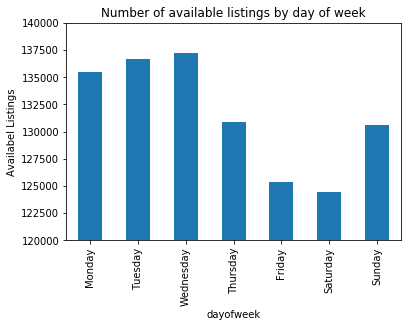

In [126]:
price_dayofweek.plot(kind='bar', ylim=(120000,140000),legend=False)
plt.ylabel('Availabel Listings')
plt.title('Number of available listings by day of week')

In [127]:
dayofweekprice = calendar_available[['dayofweek','price']].groupby('dayofweek').mean()
dayofweekprice=dayofweekprice.loc[['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 'Sunday'], :]

Text(0.5,1,'Average Price by Day of Week')

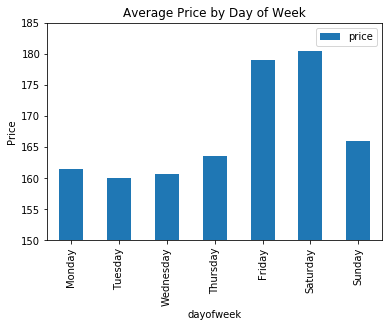

In [128]:
dayofweekprice.plot(kind='bar', ylim=(150,185))
plt.ylabel('Price')
plt.title('Average Price by Day of Week')

##### With the lowest supplies on Saturday and Friday, the average prices on that two days are much higher than the other days.

## 5.9 Different Month With Different Listing Supplies And Prices?

In [129]:
price_month=calendar_available[['price','month']]
price_month.sample(5)

price month
1696728  168.0   Mar
272113   159.0   Oct
578002   102.0   Oct
191077   105.0   Oct
779972   320.0   Jun

In [130]:
# Group by each month
price_month=price_month.groupby(by='month')

# Size of the grouped dateset
price_month=pd.DataFrame(price_month.size())

In [131]:
price_month=price_month.loc[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], :]
price_month

0
month       
Jan    75296
Feb    67890
Mar    75365
Apr    72924
May    62961
Jun    66630
Jul    90542
Aug    86916
Sep    84404
Oct    89142
Nov    74921
Dec    73760

Text(0.5,1,'Number of Available Listings by Month')

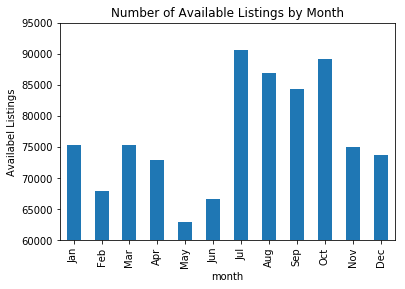

In [132]:
price_month.plot(kind='bar', ylim=(60000,95000),legend=False)
plt.ylabel('Availabel Listings')
plt.title('Number of Available Listings by Month')

In [133]:
monthprice = calendar_available[['month','price']].groupby('month').mean()
monthprice=monthprice.loc[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], :]

Text(0.5,1,'Average Price by Month')

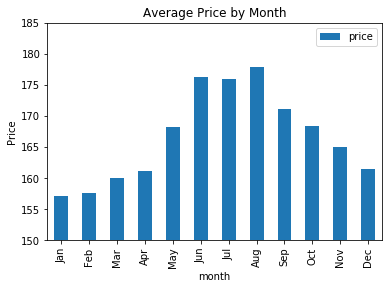

In [134]:
monthprice.plot(kind='bar', ylim=(150,185))
plt.ylabel('Price')
plt.title('Average Price by Month')

##### The trend of supplies and prices of each month seems contradicted at first glance. However, we need to consider the attractions and weather of Chicago. On Lake Michigan, Chicago has more tourists in summer while much fewer tourist in winter due to its extream cold weather. That's why August, June, and July have higher average prices than other months even the listing supplies are also high. The room supplies in winter are smaller maybe the hosts predict the less demand on market and release fewer rooms during that time. 

## 5.10 Relationships between Review Scores and Price

Price and review score are not only dependent variables of other factors mentioned above, they can affect each other.

Text(0,0.5,'price')

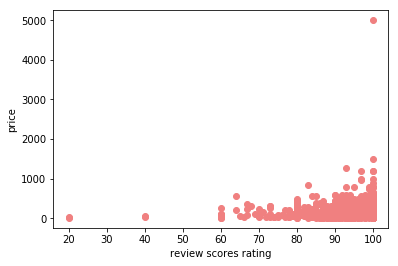

In [135]:
plt.scatter(df2['review_scores_rating'], df2['price'], color='lightcoral') 
plt.xlabel('review scores rating')
plt.ylabel('price')

Due to some outliers, the relationship between review score and price is not clear. So we exclude some outliers and only include the prices between 0 and 1000 and review scores between 60 and 100.

(0, 1001)

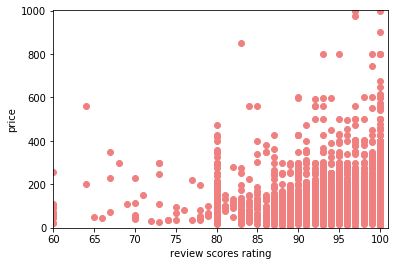

In [136]:
plt.scatter(df2['review_scores_rating'], df2['price'], color='lightcoral',) 
plt.xlabel('review scores rating')
plt.ylabel('price')
plt.xlim(60,101)
plt.ylim(0,1001)

# 6. Textual Data Exploration

In [137]:
review_scores=df1_nonnull[['review_scores_rating',
                   'review_scores_accuracy',
                   'review_scores_cleanliness',
                   'review_scores_checkin',
                   'review_scores_communication',
                   'review_scores_location',
                   'review_scores_value']]
review_scores.describe().transpose()

count       mean       std   min   25%   50%  \
review_scores_rating         3748.0  95.084045  5.992134  20.0  93.0  97.0   
review_scores_accuracy       3748.0   9.705443  0.640841   2.0  10.0  10.0   
review_scores_cleanliness    3748.0   9.533351  0.761853   2.0   9.0  10.0   
review_scores_checkin        3748.0   9.848986  0.465095   2.0  10.0  10.0   
review_scores_communication  3748.0   9.858858  0.433559   2.0  10.0  10.0   
review_scores_location       3748.0   9.591782  0.721293   2.0   9.0  10.0   
review_scores_value          3748.0   9.574440  0.686565   2.0   9.0  10.0   

                               75%    max  
review_scores_rating         100.0  100.0  
review_scores_accuracy        10.0   10.0  
review_scores_cleanliness     10.0   10.0  
review_scores_checkin         10.0   10.0  
review_scores_communication   10.0   10.0  
review_scores_location        10.0   10.0  
review_scores_value           10.0   10.0

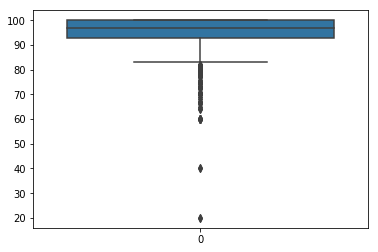

In [138]:
# overall review scores (out of 100)
ax=sns.boxplot(data=review_scores['review_scores_rating'])

[Text(0,0,'review_scores_accuracy'),
 Text(0,0,'review_scores_cleanliness'),
 Text(0,0,'review_scores_checkin'),
 Text(0,0,'review_scores_communication'),
 Text(0,0,'review_scores_location'),
 Text(0,0,'review_scores_value')]

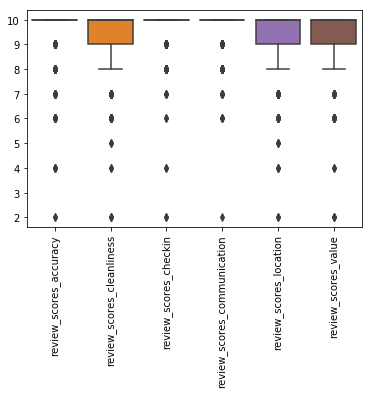

In [139]:
# review scores (out of 10) on each dimension, e.g. cleanliness, communication, etc.
ax=sns.boxplot(data=review_scores[['review_scores_accuracy',
                                   'review_scores_cleanliness',
                                   'review_scores_checkin',
                                   'review_scores_communication',
                                   'review_scores_location',
                                   'review_scores_value']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the boxplot above, we notice that review scores on cleanliness, location, and value have larger variance than the other aspects, such as accuracy, checkin, and communication. 

Next, we will move to the qualititive analysis of reviews by using wordcloud.

In [140]:
comments=reviews['comments']
comments.head()

0    Dianna는 매우 친절했다. 그리고 다른 숙박객들도 친절했다. Dianna가 집에...
1    House was clean, host was responsive.  The des...
2    I LOVED staying at the Urban Art Retreat!! Dia...
3    I was immediately greeted at the door by Diann...
4    Dianna was great with communication and super ...
Name: comments, dtype: object

The textual contents above are not fully displayed. Let's convert the pandas Series into a list and show the content in it.

In [141]:
documents=reviews['comments'].tolist()
documents[0:5]

['Dianna는 매우 친절했다. 그리고 다른 숙박객들도 친절했다. Dianna가 집에 강아지들이 있다고 해서 굉장히 귀여운 강아지를 상상했었는데, 생각보다 너무 큰 개들이라 놀랐다. 숙소 자체는 편안하고 개인공간이라 매우 좋았다. 그러나 숙소 위치가 안타깝다. 시카고 시내에서 좀 떨어져있는 곳이었는데, 위치는 찾기 쉬우나 그 주변 분위기가 조금 무서웠다. 저녁에 나갈 수가 없었다. 숙소 위치를 빼고는 꽤 괜찮은 곳이다. 하지만 시카고 여행을 하려고 계획 중이라면 시카고 시내 안에 숙소를 잡는 것이 현명할 것 같다.',
 'House was clean, host was responsive.  The description given was accurate.  There were other people staying there but I never saw anyone as I only came to drop off my stuff and then again to sleep.  \r\nThe aesthetics of the neighborhood are not really an issue because the house is literally around the corner of the train stop.  \r\nIf you are looking for somewhere to sleep and a safe place to leave your things, I would recommend this place. ',
 'I LOVED staying at the Urban Art Retreat!! Dianna\'s devotion to the arts is evident everywhere, from the yard full of sculptures and paintings to the profusion of pieces scattered about the residence to the creative names and decor of each room. Dianna

#### Create Word Clouds

In [142]:
# Import wordcloud module
from wordcloud import WordCloud

## 6.1 Word Cloud of All Reviews

In [143]:
# Combine all review documents together
text=" ".join(str(x) for x in documents)

In [144]:
# Generate a wordcloud image
wordcloud=WordCloud(background_color="white",max_font_size=40)
wordcloud.generate_from_text(text)

(-0.5, 399.5, 199.5, -0.5)

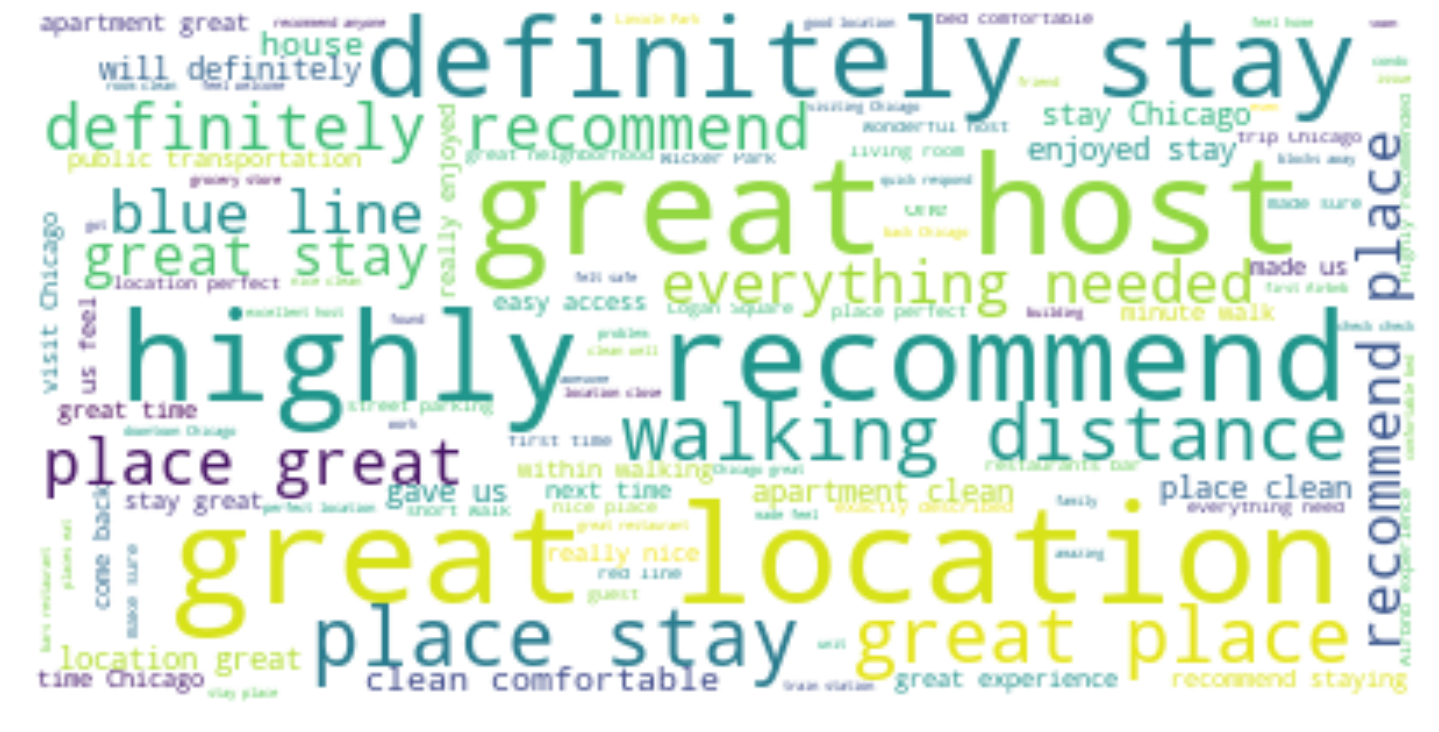

In [145]:
# Display wordcloud image
plt.figure(figsize=(25,25))
plt.imshow(wordcloud,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")

###### From the word cloud above, we notice that Airbnb customers focus a lot on location, walking distance, cleanliness, and ammerties.

## 6.2 Wordcloud of negtive comments

The wordcloud above shows the most used words in comments. Considering the graph exhibits more on positive reviews, we want to dig deeper to see what the negative reviews are.

In [146]:
review_scores=df1_nonnull[['id','review_scores_rating']]
review_scores.head()

id  review_scores_rating
0  13824783                  99.0
1  18125245                  95.0
2   8362570                  98.0
3    789867                  94.0
4  16701336                 100.0

In [147]:
bad_review_scores=review_scores[review_scores['review_scores_rating']<=30]
bad_review_scores.head()

id  review_scores_rating
135   15889957                  20.0
3731  14502969                  20.0

In [148]:
len(bad_review_scores)

2

In [149]:
comments_by_id=reviews[['listing_id','comments']]
comments_by_id.sample()

listing_id                                           comments
60218     6290441  Everything was amazing! The neighborhood is gr...

In [150]:
bad_comments=comments_by_id[comments_by_id['listing_id'].isin(bad_review_scores['id'])]
bad_comments.head()

listing_id                                           comments
66306     14502969  I do not recommend this place for tourist. Thi...
107572    15889957  I was quite frustrated by my experience with t...

In [151]:
bad_documents=bad_comments['comments'].tolist()
bad_documents[0:5]

['I do not recommend this place for tourist. This place is not safe, neither the neighborhood nor the house. The host try to fit as many guest as possible. some of the guest are mentally and emotionally challenged and on medication, one will never know how or what will trigger their mood change. Sleeping at night next to them is a major security concern. \r\nThe place is not clean, there are two bathroom for God knows how many people "10-15 guest". The staircase going down to the some bedroom are only a foot wide and very steep, I don\'t believe its within the code. bottom line the place is very musty, dingy, and not clean. If you can afford 5 to 10 dollars more choose a different option.  ',
 "I was quite frustrated by my experience with this host. My flight from Washington was delayed and I communicated this to my host who assured me a late arrival was fine. When I landed, I emailed that I had arrived at the airport and heading to apartment. When I arrived at 1:00 AM, there was nobod

In [152]:
bad_text=" ".join(str(x) for x in bad_documents)

In [153]:
bad_wordcloud=WordCloud(background_color="white",max_font_size=40)
bad_wordcloud.generate_from_text(bad_text)

(-0.5, 399.5, 199.5, -0.5)

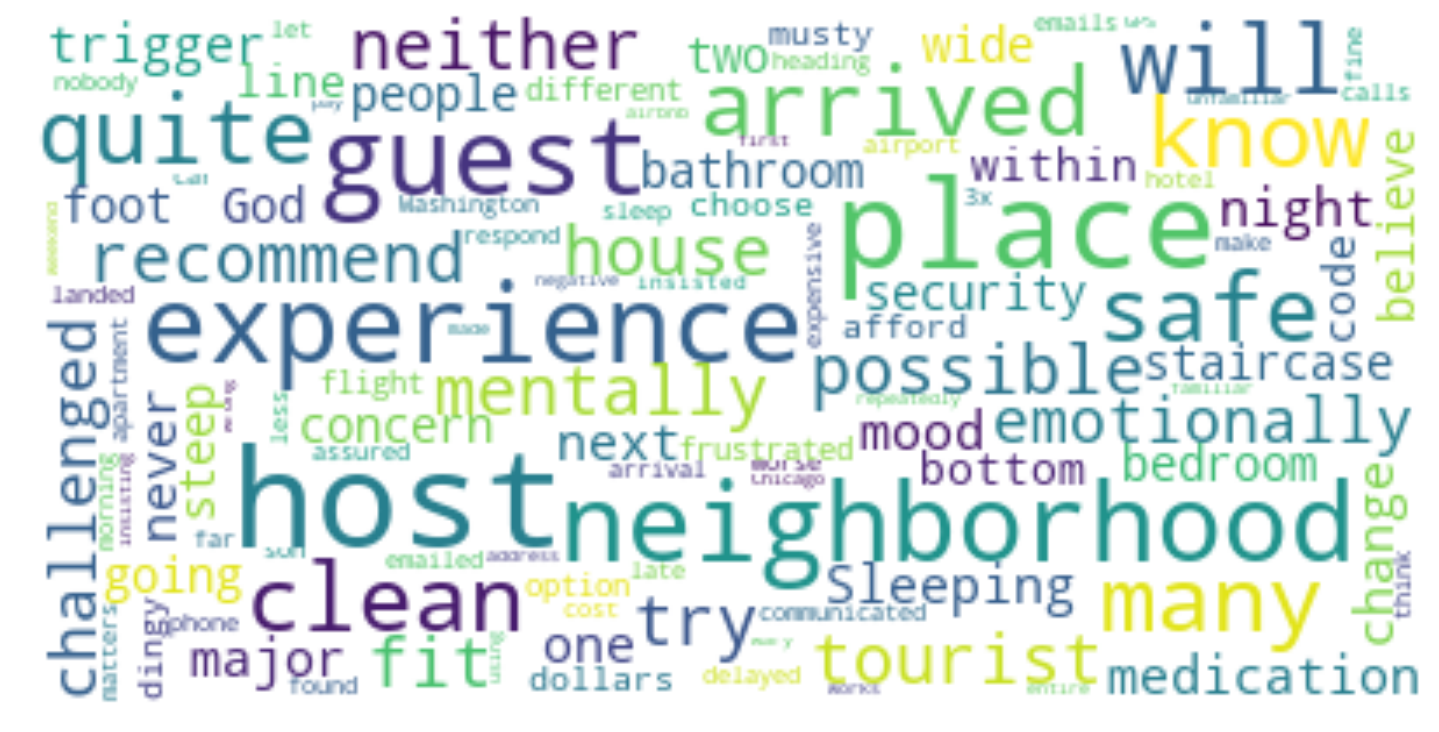

In [154]:
plt.figure(figsize=(25,25))
plt.imshow(bad_wordcloud,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")

##### The word cloud generated from bad reviews include guests' concern mostly on the neighbourhood, safty, bathroom, cleanliness. 

## 6.3 Wordcloud of negtive comments based on cleanliness

In [155]:
review_scores_clean=df1_nonnull[['id','review_scores_cleanliness']]
review_scores_clean.head()

id  review_scores_cleanliness
0  13824783                       10.0
1  18125245                       10.0
2   8362570                       10.0
3    789867                        9.0
4  16701336                       10.0

In [156]:
bad_review_scores_clean=review_scores_clean[review_scores_clean['review_scores_cleanliness']<3]
bad_review_scores_clean

id  review_scores_cleanliness
135   15889957                        2.0
206   12382456                        2.0
3731  14502969                        2.0

In [157]:
len(bad_review_scores_clean)

3

In [158]:
comments_by_id=reviews[['listing_id','comments']]
comments_by_id.sample(10)

listing_id                                           comments
39036     10811857  First off the place was super easy to find and...
111862     8608064  This was our first experience with Airbnb & it...
40823     16302846  Great place to stay! A lot to do in the area, ...
113991     1056430  Very nice apartment, 10 min walk from wrigley ...
18265      1080532  I visited Chicago with my husband and parents ...
106914     6644524  Fee was extremely accommodating and responsive...
92013      3809530  Laura's place was just as described (well, tha...
29264     10771947  Tilek and his roommate are perfect hosts! The ...
41621     16707059  This place is on a side street in a quiet, res...
107108    16567888  Brandon's place is conveniently located in wal...

In [159]:
bad_comments_clean=comments_by_id[comments_by_id['listing_id'].isin(bad_review_scores_clean['id'])]
bad_comments_clean

listing_id                                           comments
64588     12382456  I didn't expect anything special from such a m...
64589     12382456  The host canceled this reservation 9 days befo...
64590     12382456  The host canceled this reservation the day bef...
66306     14502969  I do not recommend this place for tourist. Thi...
107572    15889957  I was quite frustrated by my experience with t...

In [160]:
bad_documents_clean=bad_comments_clean['comments'].tolist()
bad_documents_clean[0:5]

["I didn't expect anything special from such a modestly priced location. When I made the booking, I read that the bed was an air matress, and I was fine with that, needing only a bathroom and a place to sleep while on a short trip to Chicago.\r\n\r\nUnfortunately, the bathroom was absolutely filthy. The sink, tub, and toilet were absolutely caked with brown grime, dust, hair clippings and toothpaste residue. The bathroom had clearly not been cleaned for a long period of time. Further, one of the two towels was covered in toothpaste, and the other was clearly unwashed. Luckily, I'd brought my own towel, and I found cleaning supplies, but this was the first Airbnb stay I've had that required me to do basic housework for the owner before I could use the bathroom.\r\n\r\nAside from the condition of the bathroom, the location was fine for the price. It's a lovely neighborhood, and there was street parking available within a few blocks walk.\r\n\r\nWhile I realize that Sam is currently trave

In [161]:
bad_text_clean=" ".join(str(x) for x in bad_documents_clean)

In [162]:
bad_wordcloud_clean=WordCloud(background_color="white",max_font_size=40)
bad_wordcloud_clean.generate_from_text(bad_text_clean)

(-0.5, 399.5, 199.5, -0.5)

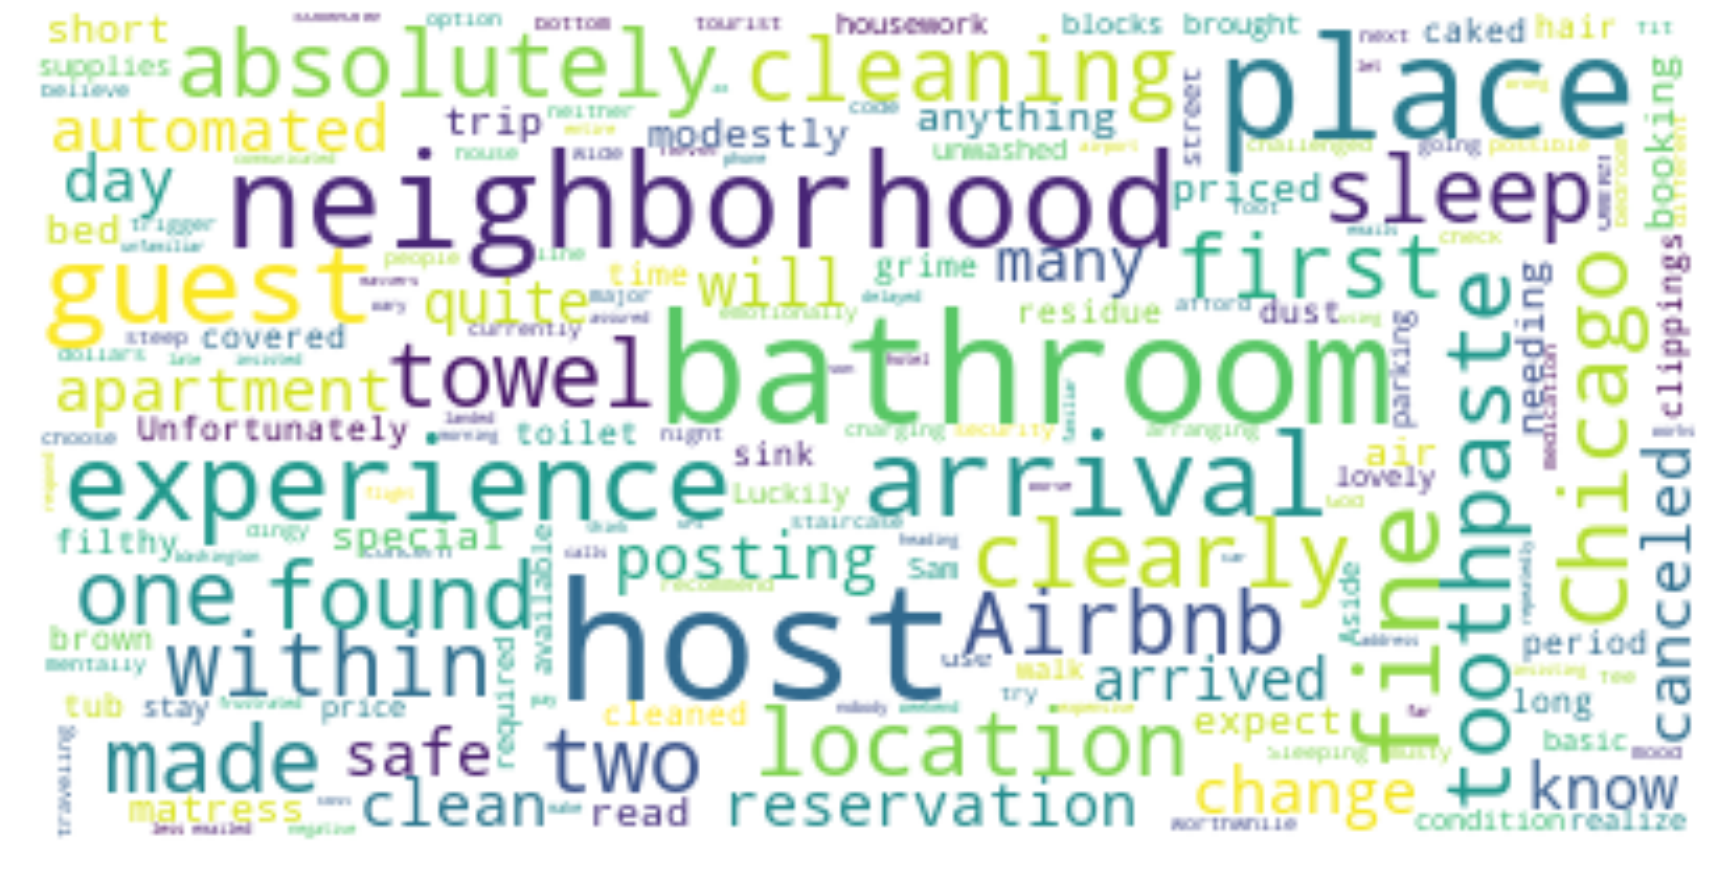

In [163]:
plt.figure(figsize=(30,20))
plt.imshow(bad_wordcloud_clean,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")

##### Within the cleanliness dimension, we found the complaints focused on bathroom, towel, bedroom, and sleeping. 

# 7. Prediction and Classification

In [164]:
#Normalization of the whole dataset_df2
df2_scale = preprocessing.minmax_scale(df2, feature_range=(0, 1), axis=0)
df2_scale = pd.DataFrame(df2_scale)
df2_scale.columns = df2.columns
df2_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 52 columns):
host_response_time_a few days or more        3748 non-null float64
host_response_time_within a day              3748 non-null float64
host_response_time_within a few hours        3748 non-null float64
host_response_time_within an hour            3748 non-null float64
host_neighbourhood_Humboldt Park             3748 non-null float64
host_neighbourhood_Lakeview                  3748 non-null float64
host_neighbourhood_Lincoln Park              3748 non-null float64
host_neighbourhood_Logan Square              3748 non-null float64
host_neighbourhood_Loop                      3748 non-null float64
host_neighbourhood_Pilsen                    3748 non-null float64
host_neighbourhood_River North               3748 non-null float64
host_neighbourhood_Uptown                    3748 non-null float64
host_neighbourhood_West Town/Noble Square    3748 non-null float64
host_neighbourhood_Wic

## 7.1 Classification of super host

In [165]:
X_scale_host = df2_scale.drop(['host_neighbourhood_Wicker Park', 'bed_type_Couch', 'cancellation_policy_super_strict',
                              'accommodates', 'bathrooms','bedrooms', 'availability_30', 
                              'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 
                              'instant_bookable','host_is_superhost'], axis=1)

In [166]:
X_scale_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 40 columns):
host_response_time_a few days or more        3748 non-null float64
host_response_time_within a day              3748 non-null float64
host_response_time_within a few hours        3748 non-null float64
host_response_time_within an hour            3748 non-null float64
host_neighbourhood_Humboldt Park             3748 non-null float64
host_neighbourhood_Lakeview                  3748 non-null float64
host_neighbourhood_Lincoln Park              3748 non-null float64
host_neighbourhood_Logan Square              3748 non-null float64
host_neighbourhood_Loop                      3748 non-null float64
host_neighbourhood_Pilsen                    3748 non-null float64
host_neighbourhood_River North               3748 non-null float64
host_neighbourhood_Uptown                    3748 non-null float64
host_neighbourhood_West Town/Noble Square    3748 non-null float64
host_neighbourhood_oth

In [167]:
y_scale_host =df2_scale['host_is_superhost'] 

In [168]:
y_scale_host.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: host_is_superhost, dtype: float64

From the regression above, we noticed that most variables have statistically significant impact on 'host_is_superhost', except those listed below:
'host_neighbourhood_Wicker Park', 'bed_type_Couch', cancellation_policy_super_strict', 'accommodates', 'bathrooms','bedrooms', 'availability_30', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 'instant_bookable'.

We will excluded those variables while doing prediction.

#### Data Partition

In [169]:
# Data partition using 20-80% simple split
# To make the result reproducible, set the random_state
train_y_scale,test_y_scale,train_X_scale,test_X_scale=model_selection.train_test_split(y_scale_host, X_scale_host,
                                                                 test_size=0.2,
                                                                 random_state=123)

## 7.1.1. K-Nearest Neighbors (kNN)

In [170]:
# Define the parameter values that should be searched
#k_range=list(range(1,20))
k_range=list(range(1,10))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [171]:
# Create a parameter grid
param_grid_knn=dict(n_neighbors=k_range)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [172]:
knn = neighbors.KNeighborsClassifier()

In [173]:
grid_knn=model_selection.GridSearchCV(knn,param_grid_knn)

In [174]:
grid_knn.fit(train_X_scale,train_y_scale.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
# Show best parameters
grid_knn.best_params_

{'n_neighbors': 4}

Since the grid_knn is tuned by using the optimal hyper parameter, we can use the grid_knn as the best k-NN model. We don't need to manually train a knn model with k = 4.

#### Evaluate k-NN Classifier

In [176]:
import itertools

In [177]:
# Predict on the test dataset
pred_y_knn = grid_knn.predict(test_X_scale)

In [178]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print('Confusion matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [179]:
from sklearn.metrics import confusion_matrix

Confusion matrix
[[464  70]
 [130  86]]


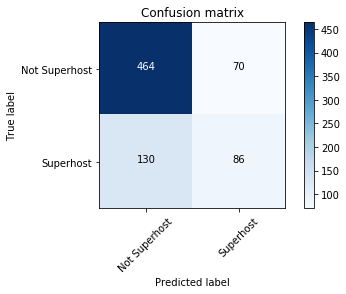

In [180]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(test_y_scale, pred_y_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['Not Superhost','Superhost'],
                      title='Confusion matrix')

In [181]:
# Calculate accuracy
metrics.accuracy_score(test_y_scale, pred_y_knn)

0.7333333333333333

In [182]:
# Calculate precision for recommended reviews
metrics.precision_score(test_y_scale, pred_y_knn)

0.5512820512820513

In [183]:
# Calculate recall for recommended reviews
metrics.recall_score(test_y_scale, pred_y_knn)

0.39814814814814814

In [184]:
# Calculate F1 score for recommended reviews
metrics.f1_score(test_y_scale, pred_y_knn)

0.46236559139784944

In [185]:
# Print classification report
target_names = ['Not Superhost', 'Superhost']
print(metrics.classification_report(test_y_scale, pred_y_knn, target_names=target_names))

               precision    recall  f1-score   support

Not Superhost       0.78      0.87      0.82       534
    Superhost       0.55      0.40      0.46       216

  avg / total       0.71      0.73      0.72       750



We notice that the datset is unbalanced: there are much fewer superhosts than non-superhosts. Thus, the accuracy really does not tell us much information regarding the performance of the prediction. We focus on the tradeoff between precision and recall to evaluate the performance of the algorithm.

From the classification report, we can find that the kNN algorithm performs very well in classifying non-superhosts, but very bad for classifying superhosts.

## 7.1.2. Decision Tree with Class Weight

#### Train a Classification Tree

In [186]:
# Define the parameter values that should be searched
#r_range=list(range(2,51))
r_range=list(range(2,20))
print(r_range)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [187]:
# Create a parameter grid
param_grid_dt=dict(min_samples_split=r_range)
print(param_grid_dt)

{'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [188]:
dt = tree.DecisionTreeClassifier(class_weight={1:3})

In [189]:
grid_dt = model_selection.GridSearchCV(dt, param_grid_dt)

In [190]:
grid_dt.fit(train_X_scale,train_y_scale)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight={1: 3}, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [191]:
# Show best parameters
grid_dt.best_params_

{'min_samples_split': 5}

#### Evaluate Classification Tree

In [192]:
# Predict on the test dataset
pred_y_dt = grid_dt.predict(test_X_scale)

Confusion matrix
[[434 100]
 [ 72 144]]


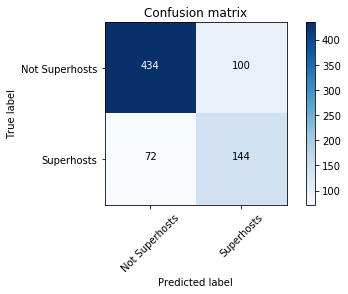

In [193]:
# Compute confusion matrix
cnf_matrix_dt = confusion_matrix(test_y_scale, pred_y_dt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes=['Not Superhosts','Superhosts'],
                      title='Confusion matrix')

In [194]:
# Print classification report
target_names = ['Not Superhosts', 'Superhosts']
print(metrics.classification_report(test_y_scale, pred_y_dt, target_names=target_names))

                precision    recall  f1-score   support

Not Superhosts       0.86      0.81      0.83       534
    Superhosts       0.59      0.67      0.63       216

   avg / total       0.78      0.77      0.77       750



## 7.1.3. Artificial Neural Network (MLP)

#### Train an MLP

In [195]:
# Define the parameter values that should be searched
# a_range=list([(300,), (250,), (200,), (150,),(120,),(100,), (90,),(80,),(50,), (50,10), (9,7,5,3)])
a_range=list([ (250,), (200,), (150,), (90,),(50,), (50,10), (9,7,5,3)])
print(a_range)

[(250,), (200,), (150,), (90,), (50,), (50, 10), (9, 7, 5, 3)]


In [196]:
param_grid_ann=dict(hidden_layer_sizes=a_range)
print(param_grid_ann)

{'hidden_layer_sizes': [(250,), (200,), (150,), (90,), (50,), (50, 10), (9, 7, 5, 3)]}


In [197]:
ann = neural_network.MLPClassifier(max_iter=500)

In [198]:
grid_ann = model_selection.GridSearchCV(ann, param_grid_ann)

In [199]:
grid_ann.fit(train_X_scale,train_y_scale.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(250,), (200,), (150,), (90,), (50,), (50, 10), (9, 7, 5, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [200]:
# Show best parameters
grid_ann.best_params_

{'hidden_layer_sizes': (50,)}

#### Evaluate the MLP

In [201]:
# Predict on the test dataset
pred_y_ann = grid_ann.predict(test_X_scale)

Confusion matrix
[[489  45]
 [155  61]]


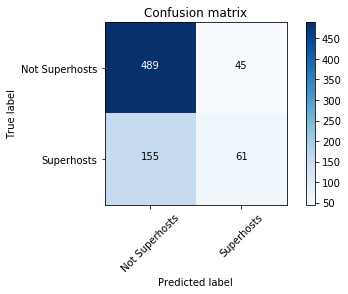

In [202]:
# Compute confusion matrix
cnf_matrix_ann = confusion_matrix(test_y_scale, pred_y_ann)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_ann, classes=['Not Superhosts','Superhosts'],
                      title='Confusion matrix')

In [203]:
# Print classification report
target_names = ['Not Superhosts', 'Superhosts']
print(metrics.classification_report(test_y_scale, pred_y_ann, target_names=target_names))

                precision    recall  f1-score   support

Not Superhosts       0.76      0.92      0.83       534
    Superhosts       0.58      0.28      0.38       216

   avg / total       0.71      0.73      0.70       750



## 7.1.4. Random Forests with Class Weight

#### Train a Random Forests

In [204]:
from sklearn import ensemble

In [205]:
param_grid_rf = [{'n_estimators':[70, 80, 90, 100, 110,120],'max_features':[10,11,12,13,14,15,16,17,18]},
           {'bootstrap':[False],'n_estimators':[3,10,20],'max_features':[2,3,4]}]
param_grid_rf

[{'max_features': [10, 11, 12, 13, 14, 15, 16, 17, 18],
  'n_estimators': [70, 80, 90, 100, 110, 120]},
 {'bootstrap': [False],
  'max_features': [2, 3, 4],
  'n_estimators': [3, 10, 20]}]

In [206]:
rf = ensemble.RandomForestClassifier(class_weight={1:3})

In [207]:
grid_rf = model_selection.GridSearchCV(rf, param_grid_rf)

In [208]:
grid_rf.fit(train_X_scale,train_y_scale.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 3}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [70, 80, 90, 100, 110, 120], 'max_features': [10, 11, 12, 13, 14, 15, 16, 17, 18]}, {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [209]:
# Show best parameters
grid_rf.best_params_

{'max_features': 11, 'n_estimators': 120}

#### Evaluate the Random Forests

In [210]:
# Predict on the test dataset
pred_y_rf = grid_rf.predict(test_X_scale)

Confusion matrix
[[479  55]
 [ 82 134]]


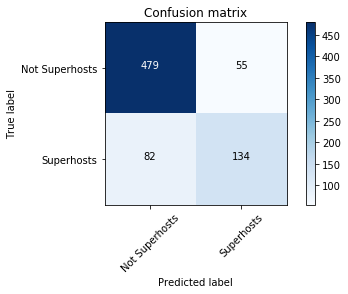

In [211]:
# Compute confusion matrix
cnf_matrix_ann = confusion_matrix(test_y_scale, pred_y_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_ann, classes=['Not Superhosts','Superhosts'],
                      title='Confusion matrix')

In [212]:
# Print classification report
target_names = ['Not Superhosts', 'Superhosts']
print(metrics.classification_report(test_y_scale, pred_y_rf, target_names=target_names))

                precision    recall  f1-score   support

Not Superhosts       0.85      0.90      0.87       534
    Superhosts       0.71      0.62      0.66       216

   avg / total       0.81      0.82      0.81       750



## 7.1.5. Logistic Regression with Class Weight

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
# Assign class_weight as 10 for class 1 (class 0 will have 1 as class weight by default)
logit = LogisticRegression(class_weight={1:3})
logit.fit(train_X_scale, train_y_scale)

LogisticRegression(C=1.0, class_weight={1: 3}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [215]:
pred_y_logit=logit.predict(test_X_scale)

Confusion matrix
[[285 249]
 [ 25 191]]


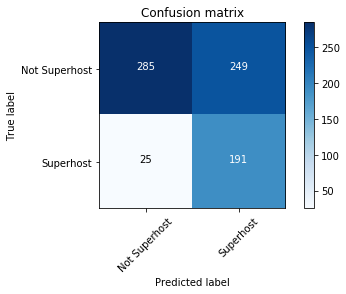

In [216]:
# Compute confusion matrix
cnf_matrix_logit = confusion_matrix(test_y_scale, pred_y_logit)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_logit, classes=['Not Superhost','Superhost'],
                      title='Confusion matrix')

In [217]:
# Print classification report
target_names = ['Not Superhosts', 'Superhosts']
print(metrics.classification_report(test_y_scale, pred_y_logit, target_names=target_names))

                precision    recall  f1-score   support

Not Superhosts       0.92      0.53      0.68       534
    Superhosts       0.43      0.88      0.58       216

   avg / total       0.78      0.63      0.65       750



## 7.1.6. Compare Various Predictive Models for superhost

In [218]:
para = [grid_knn.best_params_,grid_dt.best_params_,grid_ann.best_params_, grid_rf.best_params_, '']

acc = [metrics.accuracy_score(test_y_scale, pred_y_knn),
       metrics.accuracy_score(test_y_scale, pred_y_dt),
       metrics.accuracy_score(test_y_scale, pred_y_ann),
       metrics.accuracy_score(test_y_scale, pred_y_rf),
       metrics.accuracy_score(test_y_scale, pred_y_logit)]

pre = [metrics.precision_score(test_y_scale, pred_y_knn),
       metrics.precision_score(test_y_scale, pred_y_dt),
       metrics.precision_score(test_y_scale, pred_y_ann),
       metrics.precision_score(test_y_scale, pred_y_rf),
       metrics.precision_score(test_y_scale, pred_y_logit)]

rec = [metrics.recall_score(test_y_scale, pred_y_knn),
       metrics.recall_score(test_y_scale, pred_y_dt),
       metrics.recall_score(test_y_scale, pred_y_ann),
       metrics.recall_score(test_y_scale, pred_y_rf),
       metrics.recall_score(test_y_scale, pred_y_logit)]

f1  = [metrics.f1_score(test_y_scale, pred_y_knn),
       metrics.f1_score(test_y_scale, pred_y_dt),
       metrics.f1_score(test_y_scale, pred_y_ann),
       metrics.f1_score(test_y_scale, pred_y_rf),
       metrics.f1_score(test_y_scale, pred_y_logit)]

In [219]:
pd.DataFrame({'Parameters':para, 'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['k-NN without Class Weight','Classification Tree with Class Weight','Neural Network without Class Weight', 'Random Forests with Class Weight', 'Logistic Regression with Class Weight'],
             columns=['Parameters','Accuracy','Precision','Recall','F1 Score'])

Parameters  \
k-NN without Class Weight                                     {'n_neighbors': 4}   
Classification Tree with Class Weight                   {'min_samples_split': 5}   
Neural Network without Class Weight                {'hidden_layer_sizes': (50,)}   
Random Forests with Class Weight       {'max_features': 11, 'n_estimators': 120}   
Logistic Regression with Class Weight                                              

                                       Accuracy  Precision    Recall  F1 Score  
k-NN without Class Weight              0.733333   0.551282  0.398148  0.462366  
Classification Tree with Class Weight  0.770667   0.590164  0.666667  0.626087  
Neural Network without Class Weight    0.733333   0.575472  0.282407  0.378882  
Random Forests with Class Weight       0.817333   0.708995  0.620370  0.661728  
Logistic Regression with Class Weight  0.634667   0.434091  0.884259  0.582317

## 7.2 Prediction of price

In [220]:
X_scale_price =df2_scale[['host_neighbourhood_River North','accommodates','bathrooms','bedrooms',
                        'availability_30','review_scores_rating', 'review_scores_cleanliness',
                        'review_scores_location','host_response_time_a few days or more',
                        'host_response_time_within an hour','host_neighbourhood_Humboldt Park',
                        'host_neighbourhood_Logan Square','host_neighbourhood_Pilsen',
                        'host_neighbourhood_West Town/Noble Square','host_neighbourhood_other', 
                        'property_type_Apartment', 'property_type_Condominium','property_type_House',
                        'room_type_Private room',"room_type_Shared room","bed_type_Airbed",
                        'bed_type_Real Bed',"cancellation_policy_flexible",'cancellation_policy_moderate',
                        'cancellation_policy_strict','host_total_listings_count', 'number_of_reviews',
                        'review_scores_value']] 

In [221]:
X_scale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 28 columns):
host_neighbourhood_River North               3748 non-null float64
accommodates                                 3748 non-null float64
bathrooms                                    3748 non-null float64
bedrooms                                     3748 non-null float64
availability_30                              3748 non-null float64
review_scores_rating                         3748 non-null float64
review_scores_cleanliness                    3748 non-null float64
review_scores_location                       3748 non-null float64
host_response_time_a few days or more        3748 non-null float64
host_response_time_within an hour            3748 non-null float64
host_neighbourhood_Humboldt Park             3748 non-null float64
host_neighbourhood_Logan Square              3748 non-null float64
host_neighbourhood_Pilsen                    3748 non-null float64
host_neighbourhood_Wes

In [222]:
y_scale_price = df2_scale['price']

In [223]:
y_scale_price.head()

0    0.009218
1    0.014028
2    0.014028
3    0.002004
4    0.003607
Name: price, dtype: float64

### Data Partition

In [224]:
# Data partition using 20-80% simple split
# To make the result reproducible, set the random_state
train_yp,test_yp,train_Xp,test_Xp=model_selection.train_test_split(y_scale_price, X_scale_price,
                                                                 test_size=0.2,
                                                                 random_state=123)

In [225]:
train_yp.shape

(2998,)

In [226]:
train_Xp.shape

(2998, 28)

In [227]:
test_yp.shape

(750,)

In [228]:
test_Xp.shape

(750, 28)

## 7.2.1. K-Nearest Neighbors (kNN)

In [229]:
# Candidate values of k
#k = np.arange(30) + 1
k=list(range(15,30))
print(k)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [230]:
para_knn = {'n_neighbors':k}
para_knn

{'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}

In [231]:
knn = neighbors.KNeighborsRegressor()

In [232]:
grid_knn = model_selection.GridSearchCV(knn, para_knn)

In [233]:
grid_knn.fit(train_Xp,train_yp)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [234]:
# Show best parameters
grid_knn.best_params_

{'n_neighbors': 15}

#### Evaluate k-NN

In [235]:
# Predict on test set
pred_y_scale_knn = grid_knn.predict(test_Xp)

Text(0,0.5,'Predicted Price')

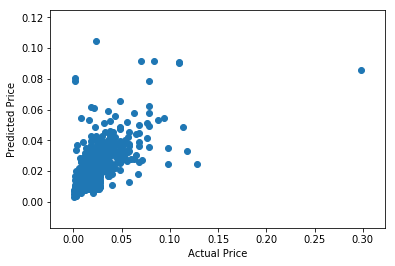

In [236]:
plt.scatter(test_yp, pred_y_scale_knn)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [237]:
# Calculate MAE
metrics.mean_absolute_error(test_yp, pred_y_scale_knn)

0.008819630371854821

In [238]:
# Calculate R squared
metrics.r2_score(test_yp, pred_y_scale_knn)

0.40898783184678245

In [239]:
# Calculate MSE
metrics.regression.mean_squared_error(test_yp, pred_y_scale_knn)

0.00024677763084991327

In [240]:
# Calculate RMSE 
np.sqrt(((test_yp - pred_y_scale_knn) ** 2).mean())

0.015709157547427972

## 7.2.2 Train a Regression Tree

In [241]:
# np.arange(2,51)
np.arange(30,51)

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50])

In [242]:
para_dt = {'min_samples_split':np.arange(2,51)}
para_dt

{'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [243]:
dt = tree.DecisionTreeRegressor()

In [244]:
grid_dt = model_selection.GridSearchCV(dt, para_dt)

In [245]:
grid_dt.fit(train_Xp,train_yp)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [246]:
# Show best parameters
grid_dt.best_params_

{'min_samples_split': 49}

### Evaluate Regression Tree

In [247]:
# Predict on test set
pred_y_dt = grid_dt.predict(test_Xp)

Text(0,0.5,'Predicted Price')

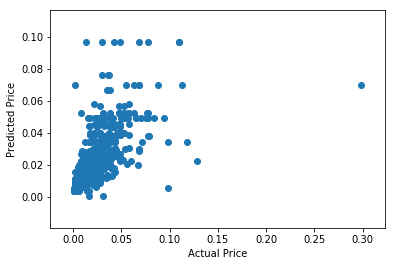

In [248]:
plt.scatter(test_yp, pred_y_dt)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [249]:
# Calculate MAE
metrics.mean_absolute_error(test_yp, pred_y_dt)

0.008582470862843894

In [250]:
# Calculate R squared
metrics.r2_score(test_yp, pred_y_dt)

0.379434922266788

In [251]:
# Calculate MSE
metrics.regression.mean_squared_error(test_yp, pred_y_dt)

0.00025911747324886377

In [252]:
# Calculate RMSE 
np.sqrt(((test_yp - pred_y_dt) ** 2).mean())

0.016097126241937217

## 7.2.3. Artificial Neural Network

In [253]:
para_ann = {'hidden_layer_sizes':[(300,),(250,),(200,), (150,),(100,), (50,),(50,10), (9,7,5,3)]}
para_ann

{'hidden_layer_sizes': [(300,),
  (250,),
  (200,),
  (150,),
  (100,),
  (50,),
  (50, 10),
  (9, 7, 5, 3)]}

In [254]:
ann = neural_network.MLPRegressor()

In [255]:
grid_ann = model_selection.GridSearchCV(ann, para_ann)

In [256]:
grid_ann.fit(train_Xp,train_y_scale)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(300,), (250,), (200,), (150,), (100,), (50,), (50, 10), (9, 7, 5, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [257]:
# Show best parameters
grid_ann.best_params_

{'hidden_layer_sizes': (50, 10)}

In [258]:
# Predict on test set
pred_y_scale_ann = grid_ann.predict(test_Xp)

Text(0,0.5,'Predicted Price')

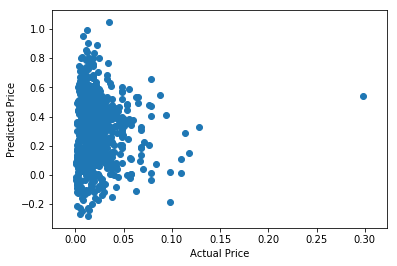

In [259]:
plt.scatter(test_yp, pred_y_scale_ann)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [260]:
# Calculate MAE
metrics.mean_absolute_error(test_yp, pred_y_scale_ann)

0.30058504601039127

In [261]:
# Calculate R squared
metrics.r2_score(test_yp, pred_y_scale_ann)

-301.646121373223

In [262]:
# Calculate MSE
metrics.regression.mean_squared_error(test_yp, pred_y_scale_ann)

0.12637014403912775

In [263]:
# Calculate RMSE 
np.sqrt(((test_yp - pred_y_scale_ann) ** 2).mean())

0.3554857859874678

## 7.2.4 Compare the performance

In [264]:
para = [grid_knn.best_params_,grid_dt.best_params_,grid_ann.best_params_]

mae = [metrics.mean_absolute_error(test_yp, pred_y_scale_knn),
       metrics.mean_absolute_error(test_yp, pred_y_dt),
       metrics.mean_absolute_error(test_yp, pred_y_scale_ann)]

r2 = [metrics.r2_score(test_yp, pred_y_scale_knn),
      metrics.r2_score(test_yp, pred_y_dt),
      metrics.r2_score(test_yp, pred_y_scale_ann)]

mse = [metrics.regression.mean_squared_error(test_yp, pred_y_scale_knn),
       metrics.regression.mean_squared_error(test_yp, pred_y_dt),
       metrics.regression.mean_squared_error(test_yp, pred_y_scale_ann)]

rmse =[np.sqrt(((test_yp - pred_y_scale_knn) ** 2).mean()),
      np.sqrt(((test_yp - pred_y_dt) ** 2).mean()),
      np.sqrt(((test_yp - pred_y_scale_ann) ** 2).mean())] 

In [265]:
pd.DataFrame({'Parameters':para,
              'MAE':mae, 'R2':r2, 
              'MSE':mse, 'RMSE':rmse},
            index = ['k-NN','Regression Tree','Neural Network'])

MAE       MSE                        Parameters  \
k-NN             0.008820  0.000247               {'n_neighbors': 15}   
Regression Tree  0.008582  0.000259         {'min_samples_split': 49}   
Neural Network   0.300585  0.126370  {'hidden_layer_sizes': (50, 10)}   

                         R2      RMSE  
k-NN               0.408988  0.015709  
Regression Tree    0.379435  0.016097  
Neural Network  -301.646121  0.355486

## 7.3 Prediction of review score

In [266]:
X_scale_score =df2_scale[['host_is_superhost', 'bathrooms', 'review_scores_accuracy', 
                          'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                          'review_scores_location', 'review_scores_value', 'price','host_neighbourhood_River North',
                          'property_type_Apartment', 'property_type_Condominium', 'property_type_other', 
                          'room_type_Entire home/apt', 'bed_type_Airbed', 'cancellation_policy_moderate',
                          'host_total_listings_count', 'beds', 'number_of_reviews', 'instant_bookable']] 

In [267]:
X_scale_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 20 columns):
host_is_superhost                 3748 non-null float64
bathrooms                         3748 non-null float64
review_scores_accuracy            3748 non-null float64
review_scores_cleanliness         3748 non-null float64
review_scores_checkin             3748 non-null float64
review_scores_communication       3748 non-null float64
review_scores_location            3748 non-null float64
review_scores_value               3748 non-null float64
price                             3748 non-null float64
host_neighbourhood_River North    3748 non-null float64
property_type_Apartment           3748 non-null float64
property_type_Condominium         3748 non-null float64
property_type_other               3748 non-null float64
room_type_Entire home/apt         3748 non-null float64
bed_type_Airbed                   3748 non-null float64
cancellation_policy_moderate      3748 non-null float

In [268]:
y_scale_score = df2_scale['review_scores_rating']

In [269]:
y_scale_score.head()

0    0.9875
1    0.9375
2    0.9750
3    0.9250
4    1.0000
Name: review_scores_rating, dtype: float64

### Data Partition

In [270]:
# Data partition using 20-80% simple split
# To make the result reproducible, set the random_state
train_ys,test_ys,train_Xs,test_Xs=model_selection.train_test_split(y_scale_score, X_scale_score,
                                                                 test_size=0.2,
                                                                 random_state=123)

In [271]:
train_Xs.shape

(2998, 20)

In [272]:
train_ys.shape

(2998,)

In [273]:
test_Xs.shape

(750, 20)

In [274]:
test_ys.shape

(750,)

## 7.3.1 K-NN

In this section, we use k-NN, regression tree, SVM, and neural network models to predict review score rate.

In [275]:
# np.arange(2,51)
k2 = np.arange(2,30)

In [276]:
para_knn2 = {'n_neighbors':k2}
para_knn2

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [277]:
knn2 = neighbors.KNeighborsRegressor()

In [278]:
grid_knn2 = model_selection.GridSearchCV(knn2, para_knn2)

In [279]:
grid_knn2.fit(train_Xs,train_ys)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [280]:
# Show best parameters
grid_knn2.best_params_

{'n_neighbors': 3}

### Evaluate k-NN¶

In [281]:
# Predict on test set
pred_y2_scale_knn = grid_knn2.predict(test_Xs)

Text(0,0.5,'Predicted Review Score Rating')

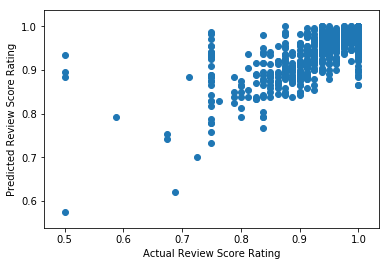

In [282]:
plt.scatter(test_ys, pred_y2_scale_knn)
plt.xlabel('Actual Review Score Rating')
plt.ylabel('Predicted Review Score Rating')

In [283]:
# Calculate MAE
metrics.mean_absolute_error(test_ys, pred_y2_scale_knn)

0.03140555555555555

In [284]:
# Calculate R squared
metrics.r2_score(test_ys, pred_y2_scale_knn)

0.5038837882301483

In [285]:
# Calculate MSE
metrics.regression.mean_squared_error(test_ys, pred_y2_scale_knn)

0.0028163657407407404

In [286]:
# Calculate RMSE 
np.sqrt(((test_ys - pred_y2_scale_knn) ** 2).mean())

0.053069442627002784

## 7.3.2 Train a Regression Tree

In [287]:
k3 = np.arange(30,51)

In [288]:
para_dt2 = {'min_samples_split':k3}
para_dt2

{'min_samples_split': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50])}

In [289]:
dt2 = tree.DecisionTreeRegressor()

In [290]:
grid_dt2 = model_selection.GridSearchCV(dt2, para_dt2)

In [291]:
grid_dt2.fit(train_Xs,train_ys)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [292]:
# Show best parameters
grid_dt2.best_params_

{'min_samples_split': 50}

## Evaluate Regression Tree

In [293]:
# Predict on test set
pred_y2_dt = grid_dt2.predict(test_Xs)

Text(0,0.5,'Predicted Review Score Rating')

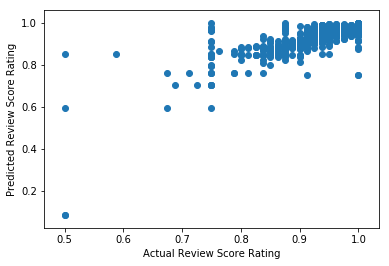

In [294]:
plt.scatter(test_ys, pred_y2_dt)
plt.xlabel('Actual Review Score Rating')
plt.ylabel('Predicted Review Score Rating')

In [295]:
# Calculate MAE
metrics.mean_absolute_error(test_ys, pred_y2_dt)

0.028562240825413927

In [296]:
# Calculate R squared
metrics.r2_score(test_ys, pred_y2_dt)

0.5382256747662368

In [297]:
# Calculate MSE
metrics.regression.mean_squared_error(test_ys, pred_y2_dt)

0.002621412803469033

In [298]:
# Calculate RMSE 
np.sqrt(((test_ys - pred_y2_dt) ** 2).mean())

0.05119973440818842

### 7.3.3 Train a Neural Network

In [299]:
para_ann2 = {'hidden_layer_sizes':[(300,),
                                  (250,),
                                  (200,),
                                  (150,),
                                  (100,),
                                  (50,),
                                  (50,10),
                                  (9,7,5,3)]}
para_ann2

{'hidden_layer_sizes': [(300,),
  (250,),
  (200,),
  (150,),
  (100,),
  (50,),
  (50, 10),
  (9, 7, 5, 3)]}

In [300]:
ann2 = neural_network.MLPRegressor()

In [301]:
grid_ann2 = model_selection.GridSearchCV(ann2, para_ann2)

In [302]:
grid_ann2.fit(train_Xs,train_ys)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(300,), (250,), (200,), (150,), (100,), (50,), (50, 10), (9, 7, 5, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [303]:
# Show best parameters
grid_ann2.best_params_

{'hidden_layer_sizes': (250,)}

### Evaluate Neural Network

In [304]:
# Predict on test set
pred_y2_scale_ann = grid_ann2.predict(test_Xs)

Text(0,0.5,'Predicted Review Score Rate')

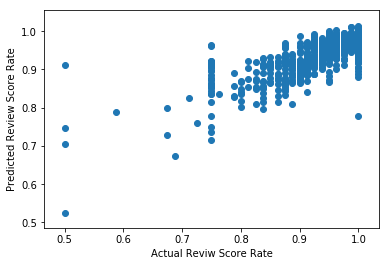

In [305]:
plt.scatter(test_ys, pred_y2_scale_ann)
plt.xlabel('Actual Reviw Score Rate')
plt.ylabel('Predicted Review Score Rate')

In [306]:
# Calculate MAE
metrics.mean_absolute_error(test_ys, pred_y2_scale_ann)

0.031816625926620046

In [307]:
# Calculate R squared
metrics.r2_score(test_ys, pred_y2_scale_ann)

0.5948722085630016

In [308]:
# Calculate MSE
metrics.regression.mean_squared_error(test_ys, pred_y2_scale_ann)

0.0022998402498373236

In [309]:
# Calculate RMSE 
np.sqrt(((test_ys - pred_y2_scale_ann) ** 2).mean())

0.04795664969362772

## 7.3.4 Compare Three Models¶

In [310]:
para = [grid_knn2.best_params_,grid_dt2.best_params_,grid_ann2.best_params_]

mae = [metrics.mean_absolute_error(test_ys, pred_y2_scale_knn),
       metrics.mean_absolute_error(test_ys, pred_y2_dt),
       metrics.mean_absolute_error(test_ys, pred_y2_scale_ann)]

r2 = [metrics.r2_score(test_ys, pred_y2_scale_knn),
      metrics.r2_score(test_ys, pred_y2_dt),
      metrics.r2_score(test_ys, pred_y2_scale_ann)]

mse = [metrics.regression.mean_squared_error(test_ys, pred_y2_scale_knn),
       metrics.regression.mean_squared_error(test_ys, pred_y2_dt),
       metrics.regression.mean_squared_error(test_ys, pred_y2_scale_ann)]

rmse =[np.sqrt(((test_ys - pred_y2_scale_knn) ** 2).mean()),
      np.sqrt(((test_ys - pred_y2_dt) ** 2).mean()),
      np.sqrt(((test_ys - pred_y2_scale_ann) ** 2).mean())] 

In [311]:
pd.DataFrame({'Parameters':para,
              'MAE':mae, 'R2':r2, 
              'MSE':mse, 'RMSE':rmse},
            index = ['k-NN','Regression Tree','Neural Network'])

MAE       MSE                      Parameters        R2  \
k-NN             0.031406  0.002816              {'n_neighbors': 3}  0.503884   
Regression Tree  0.028562  0.002621       {'min_samples_split': 50}  0.538226   
Neural Network   0.031817  0.002300  {'hidden_layer_sizes': (250,)}  0.594872   

                     RMSE  
k-NN             0.053069  
Regression Tree  0.051200  
Neural Network   0.047957

# 8. Cluster Analysis

RFM (Recency, Frequency, Monetary value) analysis is a popular technique to market segmentation. Here we use the RFM analysis to understand the listings on Airbnb. Here we calculate the following 3 characteristics and use them to cluster all listings in Chicago.

- **Recency**: How recently did the listing receive review?
- **Frequency**: How often do they rent their property (30-availability_30)?
- **Monetary Value**: How much do they earn (price*(30-availability_30))?

In [312]:
import datetime

recency=datetime.date(2017,5,10)-df1_nonnull['last_review']
recency.head()

0     3 days
1     1 days
2   184 days
3    24 days
4   105 days
Name: last_review, dtype: timedelta64[ns]

In [313]:
recency=recency.dt.days
recency.head()

0      3
1      1
2    184
3     24
4    105
Name: last_review, dtype: int64

In [314]:
frequency=30-df1_nonnull['availability_30']
frequency.head()

0    29
1    19
2    26
3    17
4    30
Name: availability_30, dtype: int64

In [315]:
money_value=df1_nonnull['price']*frequency
money_value.head()

0    1624.0
1    1520.0
2    2080.0
3     340.0
4     840.0
dtype: float64

In [316]:
listing_id=df1_nonnull['id']
listing_id.head()

0    13824783
1    18125245
2     8362570
3      789867
4    16701336
Name: id, dtype: object

In [317]:
dat_listing=pd.concat([listing_id,recency,frequency,money_value],axis=1)
dat_listing.columns=['Listing_id','Recency','Frequency','Money_value']
dat_listing.head()

Listing_id  Recency  Frequency  Money_value
0   13824783        3         29       1624.0
1   18125245        1         19       1520.0
2    8362570      184         26       2080.0
3     789867       24         17        340.0
4   16701336      105         30        840.0

In [318]:
dat_listing=dat_listing.set_index('Listing_id')
dat_listing.head()

Recency  Frequency  Money_value
Listing_id                                 
13824783          3         29       1624.0
18125245          1         19       1520.0
8362570         184         26       2080.0
789867           24         17        340.0
16701336        105         30        840.0

In [319]:
dat_listing.describe()

Recency    Frequency   Money_value
count  3748.000000  3748.000000   3748.000000
mean     69.750267    19.566969   2321.475187
std     122.951127     8.624018   2088.352476
min       0.000000     0.000000      0.000000
25%       5.000000    14.000000   1016.500000
50%      17.000000    21.000000   1870.000000
75%      68.250000    27.000000   2997.750000
max    1427.000000    30.000000  21600.000000

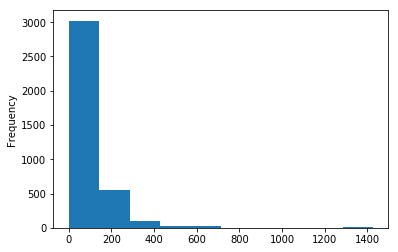

In [320]:
dat_listing['Recency'].plot(kind='hist')

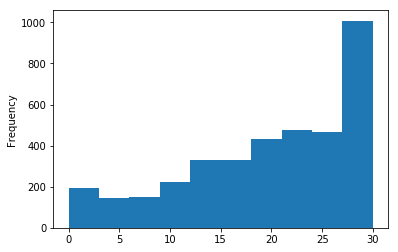

In [321]:
dat_listing['Frequency'].plot(kind='hist')

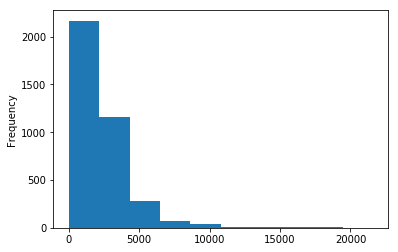

In [322]:
dat_listing['Money_value'].plot(kind='hist')

In [323]:
# From the above histograms, we find that the RFM variables are skewed. Let's log-transform the data.

dat_listing = dat_listing.assign(Recency_Log=np.log(dat_listing['Recency']+1),
                                 Frequency_Log=np.log(dat_listing['Frequency']+1),
                                 Money_value_Log=np.log(dat_listing['Money_value']+1))

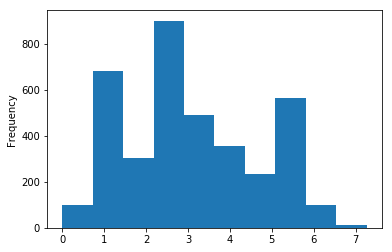

In [324]:
dat_listing['Recency_Log'].plot(kind='hist')

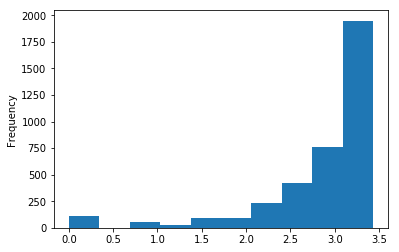

In [325]:
dat_listing['Frequency_Log'].plot(kind='hist')

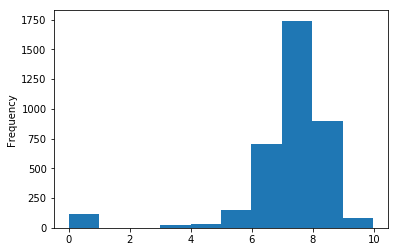

In [326]:
dat_listing['Money_value_Log'].plot(kind='hist')

In [327]:
# Show the summary statistics of the log transformed dataset.
dat_listing.describe()

Recency    Frequency   Money_value  Recency_Log  Frequency_Log  \
count  3748.000000  3748.000000   3748.000000  3748.000000    3748.000000   
mean     69.750267    19.566969   2321.475187     3.127312       2.849702   
std     122.951127     8.624018   2088.352476     1.522215       0.743929   
min       0.000000     0.000000      0.000000     0.000000       0.000000   
25%       5.000000    14.000000   1016.500000     1.791759       2.708050   
50%      17.000000    21.000000   1870.000000     2.890372       3.091042   
75%      68.250000    27.000000   2997.750000     4.237704       3.332205   
max    1427.000000    30.000000  21600.000000     7.264030       3.433987   

       Money_value_Log  
count      3748.000000  
mean          7.230079  
std           1.543967  
min           0.000000  
25%           6.925104  
50%           7.534228  
75%           8.005951  
max           9.980495

Also the scales of these three variables are quite different. The similarity/distance measures used in the clustering process are highly influenced by the scale of each variable. It is therefore better to normalize data as we have variables measured in different scales. In this case, we normalize the data into the scale range [0, 1].

In [328]:
# Normalize columns in X to range [0,1]
dat_listing_scaled = preprocessing.minmax_scale(dat_listing, feature_range=(0, 1), axis=0)
dat_listing_scaled = pd.DataFrame(dat_listing_scaled)
dat_listing_scaled.columns = dat_listing.columns

dat_listing_scaled.describe()

Recency    Frequency  Money_value  Recency_Log  Frequency_Log  \
count  3748.000000  3748.000000  3748.000000  3748.000000    3748.000000   
mean      0.048879     0.652232     0.107476     0.430520       0.829852   
std       0.086161     0.287467     0.096683     0.209555       0.216637   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.003504     0.466667     0.047060     0.246662       0.788602   
50%       0.011913     0.700000     0.086574     0.397902       0.900132   
75%       0.047828     0.900000     0.138785     0.583382       0.970360   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       Money_value_Log  
count      3748.000000  
mean          0.724421  
std           0.154698  
min           0.000000  
25%           0.693864  
50%           0.754895  
75%           0.802160  
max           1.000000

## Hierarchical Agglomerative Clustering

Here we use the Ward method to do the hierarchical clustering. Ward's method tends to result in clusters of roughly equal size. This could be beneficial in many applications.

In [329]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [330]:
# Compute the distance
data_dist = pdist(dat_listing_scaled[['Recency_Log','Frequency_Log','Money_value_Log']], 
                  metric='euclidean')

In [331]:
# Compute the linkage
data_link = hierarchy.linkage(data_dist, method='ward', metric='euclidean') 

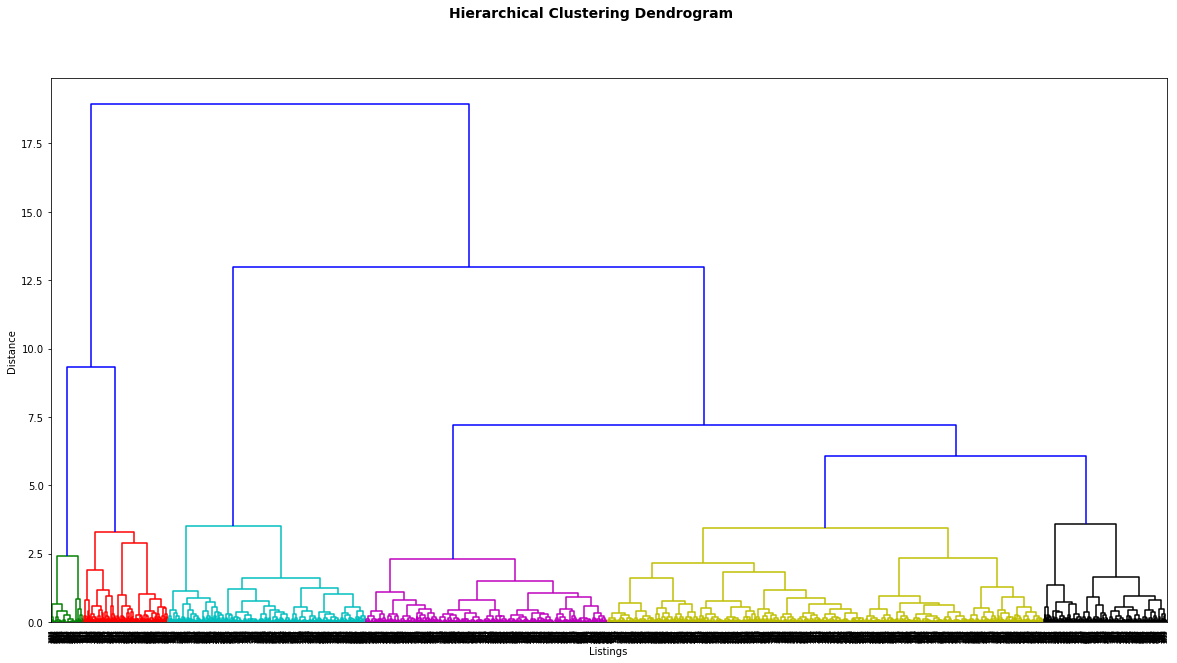

In [332]:
plt.figure(figsize=(20,10))
hierarchy.dendrogram(data_link,color_threshold=5)
plt.xlabel('Listings')
plt.ylabel('Distance')
plt.suptitle('Hierarchical Clustering Dendrogram', fontweight='bold', fontsize=14);

We cut the clustering tree into 6 clusters, by using the distance as criterion and 5.0 as the threshold.

In [333]:
# Get the cluster, add it to the listing DataFrame
dat_listing = dat_listing.assign(Cluster_H= hierarchy.fcluster(data_link,
                                                               t=5.0,
                                                               criterion='distance'))

dat_listing.head()

Recency  Frequency  Money_value  Recency_Log  Frequency_Log  \
Listing_id                                                                
13824783          3         29       1624.0     1.386294       3.401197   
18125245          1         19       1520.0     0.693147       2.995732   
8362570         184         26       2080.0     5.220356       3.295837   
789867           24         17        340.0     3.218876       2.890372   
16701336        105         30        840.0     4.663439       3.433987   

            Money_value_Log  Cluster_H  
Listing_id                              
13824783           7.393263          4  
18125245           7.327123          4  
8362570            7.640604          3  
789867             5.831882          5  
16701336           6.734592          3

In [334]:
# Count the number of listings per cluster
dat_listing.Cluster_H.value_counts()

5    1467
4     813
3     663
6     411
2     282
1     112
Name: Cluster_H, dtype: int64

In [335]:
# Avarage RFM by cluster
dat_listing[['Recency','Frequency','Money_value','Cluster_H']].groupby(by='Cluster_H').mean()

Recency  Frequency  Money_value
Cluster_H                                    
1          249.071429   0.000000     0.000000
2          163.322695   3.992908   648.187943
3          220.561086  23.104072  3274.381599
4            2.833948  22.247232  2467.665437
5           21.252215  23.421268  2656.835037
6           18.875912  10.819951  1078.822384

According to the hierarchy clustering algorithm, the 813 listings in cluster 4 are most important to Airbnb, while 112 listings in cluster 1 are least important. 

## K-Means Clustering

Now, let's use fit a 6-cluster k-means model to the scaled dataset.

In [336]:
from sklearn.cluster import KMeans

In [337]:
# Initialize KMeans
kmeans = KMeans(n_clusters=6)
# Fit with data
kmeans = kmeans.fit(dat_listing_scaled[['Recency_Log','Frequency_Log','Money_value_Log']])

In [338]:
# Predict the cluster, add it to the listing DataFrame
dat_listing = dat_listing.assign(Cluster_K= \
                                 kmeans.predict(dat_listing_scaled[['Recency_Log','Frequency_Log','Money_value_Log']]))

dat_listing.head()

Recency  Frequency  Money_value  Recency_Log  Frequency_Log  \
Listing_id                                                                
13824783          3         29       1624.0     1.386294       3.401197   
18125245          1         19       1520.0     0.693147       2.995732   
8362570         184         26       2080.0     5.220356       3.295837   
789867           24         17        340.0     3.218876       2.890372   
16701336        105         30        840.0     4.663439       3.433987   

            Money_value_Log  Cluster_H  Cluster_K  
Listing_id                                         
13824783           7.393263          4          2  
18125245           7.327123          4          2  
8362570            7.640604          3          1  
789867             5.831882          5          5  
16701336           6.734592          3          1

In [339]:
# Count the number of customers per cluster
dat_listing.Cluster_K.value_counts()

5    1362
2     920
1     652
0     408
4     279
3     127
Name: Cluster_K, dtype: int64

In [340]:
# Avarage RFM by cluster
dat_listing[['Recency','Frequency','Money_value','Cluster_K']].groupby(by='Cluster_K').mean()

Recency  Frequency  Money_value
Cluster_K                                    
0            9.382353  10.460784  1078.500000
1          219.144172  23.599693  3267.716258
2            3.458696  23.113043  2615.634783
3          238.370079   0.118110     3.000000
4          175.612903   4.734767   768.161290
5           23.687959  22.820852  2576.525698

According to k-means clustering algorithms, the 920 listings in cluster 1 are most important to Airbnb, while the 127 listings in cluster 2 are least important.

In [341]:
from mpl_toolkits.mplot3d import Axes3D

In [342]:
X=dat_listing_scaled[['Recency_Log','Frequency_Log','Money_value_Log']]
y=dat_listing['Cluster_K']

# Initializing KMeans
kmeans = KMeans(n_clusters=6)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

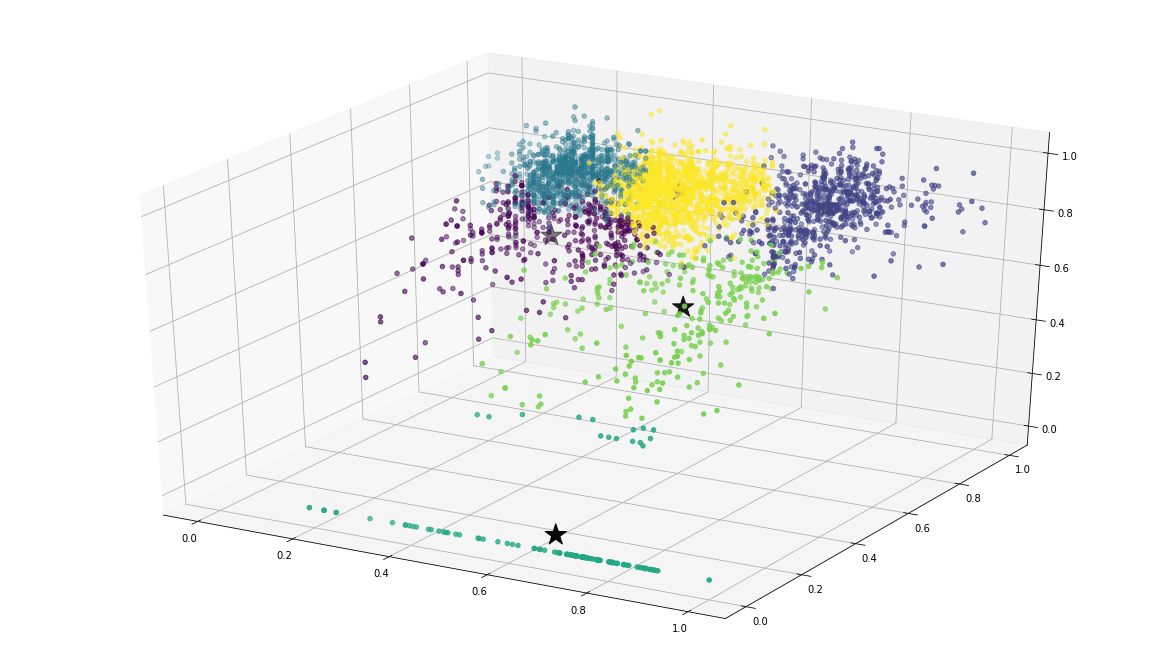

In [343]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.values[:, 0], X.values[:, 1], X.values[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=500)

# 9. Takeaways

- Airbnb's two-way review system was introduced to make hosts feel confident to let strangers stay at their homes. However, in reality, it curbed guests' involvement in putting real comments.
- The word cloud generated from bad reviews indicated that the guests' concern mostly on the neighbourhood, safety, bathroom, cleanliness.
- Prices and listings availability changed in opposite directions, which was consistent with the law of supply and demand.
- Superhost is related to better review scores and higher prices. We recommend Airbnb encourage its hosts to become superhosts to enhance staying experience.
- Based on the clustering analysis, Airbnb should focus more on those listings in the cluster with high RFM.